# ST115 Managing and visualising data

## Lecture 4: Visualisation and exploratory data analysis

### 2022/23 Lent Term

## Recap: Last week

* Data exploration
    * Some idea and insights about the data 
        * What does the data contain?
        * Quality of data
* Data wrangling
    * Handling missing, duplicated values
    * Format, filter, reshape the data
    * Merging datasets
    
We now know how to prepare data ready for further analysis and answering simple questions.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Today's plan

* Data visualisation - why?
* Exploratory data analysis via visualisation
    * Visualise distribution via bar plot, histogram, density plot
    * Compare distribution via boxplot and violin plot
    * Discover relations between quantitative variables via scatter plot and other plots
    * Observe trend via line plot 
* Transformation and higher dimensional data

## Teaser: Visualise distribution 

Example: Use histogram and density plot to show the distribution of age of passengers:

<center><img src="figs/hist.png" width="700"  align="center"/></center>

## Teaser: Compare distributions

Example: Use boxplot to show the distribution of age of passengers with different ticket class:

<center><img src="figs/box.png" width="700"  align="center"/></center>

## Teaser: Discover relations between 2 variables

Example: Use scatter plot for mpg vs displacement:

<center><img src="figs/scatter.png" width="700"  align="center"/></center>

## Teaser: Trend

Example: Use line to show the number of coronavirus cases in the UK over time:

<center><img src="figs/line.png" width="700"  align="center"/></center>

## Visualisation libraries used

In this lecture slides, the graphs are created using `pandas`, `matplotlib` and `seaborn`.
* To run the code in the slides, please do the following
    * Make sure all the required libraries are installed
    * Import the libraries using the following code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Note on Python code

In this lecture slides, code used to generate the graphs is given to you to illustrate how the graphs can be created in Python.
* You are _not_ expected to understand the code at this stage
    * We will talk about how to create plots in Python in the workshop
* You are advised to revisit the lecture slides to understand the code after the workshop

# Why visualisation?

## Motivative example 1: Titanic data

Suppose what we want to do is to understand more about the passengers. 
* Some pre-processing of the data before we start:

In [2]:
titanic = pd.read_csv('data/titanic/train.csv')
# changed the type of data
titanic['Survived'] = pd.Categorical.from_codes(titanic.Survived, 
                                                ['not survived', 'survived'])
titanic['Sex'] = titanic['Sex'].astype('category') 
titanic['Pclass'] = pd.Categorical(titanic['Pclass'], ordered=True) # ordinal
# select variables we are interested in
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

## Titanic data: descriptive statistics

Data exploration via descriptive statistics:

In [3]:
titanic.describe(include = 'all')

,Survived,Pclass,Sex,Age,Fare
count,891,891.0,891,714.000000,891.000000
unique,2,3.0,2,NaN,NaN
top,not survived,3.0,male,NaN,NaN
freq,549,491.0,577,NaN,NaN
mean,NaN,NaN,NaN,29.699118,32.204208
std,NaN,NaN,NaN,14.526497,49.693429
min,NaN,NaN,NaN,0.420000,0.000000
25%,NaN,NaN,NaN,20.125000,7.910400
50%,NaN,NaN,NaN,28.000000,14.454200
75%,NaN,NaN,NaN,38.000000,31.000000


## Age of passengers

Attempt to learn about the distribution of age of the passengers by looking at the raw data:

In [4]:
print(titanic['Age'].to_list()[:300])

[22.0, 38.0, 26.0, 35.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, nan, 31.0, nan, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, nan, 19.0, nan, nan, 40.0, nan, nan, 66.0, 28.0, 42.0, nan, 21.0, 18.0, 14.0, 40.0, 27.0, nan, 3.0, 19.0, nan, nan, nan, nan, 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, nan, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, nan, nan, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, nan, nan, 0.83, 30.0, 22.0, 29.0, nan, 28.0, 17.0, 33.0, 16.0, nan, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, nan, 71.0, 23.0, 34.0, 34.0, 28.0, nan, 21.0, 33.0, 37.0, 28.0, 21.0, nan, 38.0, nan, 47.0, 14.5, 22.0, 20.0, 17.0, 21.0, 70.5, 29.0, 24.0, 2.0, 21.0, nan, 32.5, 32.5, 54.0, 12.0, nan, 24.0, nan, 45.0, 33.0, 20.0, 47.0, 29.0, 25.0, 23.0, 19.0, 37.0, 16.0, 24.0, nan, 22.0, 24.0, 19.0, 18.0, 19.0, 27.0, 9.0, 36.5, 42.0, 51.0, 22.0, 55.5, 40.5, nan, 51.0, 16.0, 30.0, nan, nan, 44.0, 40.0, 26.0, 17.0, 1.0, 9.0, nan, 45.0, nan, 28.0, 61.0, 4.0, 1.0, 21.0, 56.

## Titanic data: visualise age

Visualising the same data using rug plot and histogram:

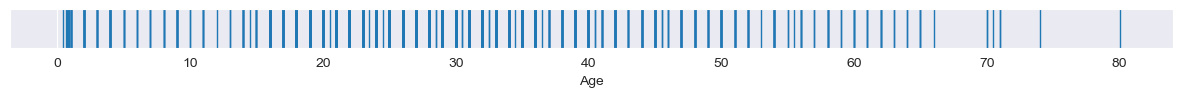

In [5]:
plt.subplots(figsize = (15, 0.5))
sns.rugplot(titanic['Age'], height=1).set(ylim=(0, 1), yticks=[]);

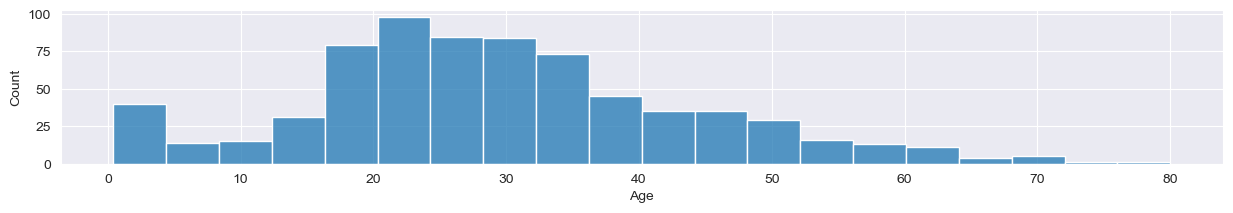

In [6]:
plt.subplots(figsize = (15, 2))
sns.histplot(titanic['Age']);

Which one gives you a better idea about the data? Raw data or graphs?

## Titanic data: age vs fare

Discover if there is any relations between variables:

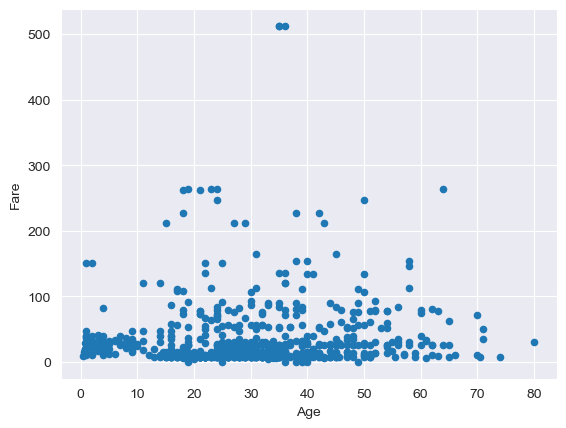

In [7]:
titanic.plot.scatter('Age', 'Fare');

In [8]:
titanic[['Age', 'Fare']].T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Age,22.00,38.0000,26.000,35.0,35.00,NaN,54.0000,2.000,27.0000,14.0000,...,33.0000,22.0000,28.0,25.00,39.000,27.0,19.0,NaN,26.0,32.00
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


## Motivative example 2: Anscombe's quartet

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, and it is often used to illustrate:
* Importance of looking at data graphically before analysing them 
* Inadequacy of basic statistic properties for describing datasets

In [9]:
num = pd.read_csv('data/anscombe.csv', usecols=[1,2,3])
num.index = list(range(11))*4
num.pivot_table(index = num.index, columns='dataset', values = ['x', 'y']). \
 swaplevel(axis = 'columns').sort_index(axis=1, level=0).T

0     1      2     3      4      5     6      7      8     9   \
dataset                                                                       
I       x  10.00  8.00  13.00  9.00  11.00  14.00  6.00   4.00  12.00  7.00   
        y   8.04  6.95   7.58  8.81   8.33   9.96  7.24   4.26  10.84  4.82   
II      x  10.00  8.00  13.00  9.00  11.00  14.00  6.00   4.00  12.00  7.00   
        y   9.14  8.14   8.74  8.77   9.26   8.10  6.13   3.10   9.13  7.26   
III     x  10.00  8.00  13.00  9.00  11.00  14.00  6.00   4.00  12.00  7.00   
        y   7.46  6.77  12.74  7.11   7.81   8.84  6.08   5.39   8.15  6.42   
IV      x   8.00  8.00   8.00  8.00   8.00   8.00  8.00  19.00   8.00  8.00   
        y   6.58  5.76   7.71  8.84   8.47   7.04  5.25  12.50   5.56  7.91   

             10  
dataset          
I       x  5.00  
        y  5.68  
II      x  5.00  
        y  4.74  
III     x  5.00  
        y  5.73  
IV      x  8.00  
        y  6.89

## Anscombe's quartet: descriptive statistics

All 4 data sets give you nearly the same mean, standard deviation and correlation:

In [10]:
summary_df = pd.concat([num.groupby('dataset').agg(['mean', 'std']), 
    num.groupby('dataset').corr().reset_index(1).iloc[::2,-1]], axis = 1)
summary_df.columns = ['mean (x)', 'sd (x)', 'mean (y)', 'sd (y)', 'corr']
summary_df.T

dataset,I,II,III,IV
mean (x),9.000000,9.000000,9.000000,9.000000
sd (x),3.316625,3.316625,3.316625,3.316625
mean (y),7.500909,7.500909,7.500000,7.500909
sd (y),2.031568,2.031657,2.030424,2.030579
corr,0.816421,0.816237,0.816287,0.816521


## Anscombe's quartet: regression

If we fit linear regression $y = \alpha + \beta x$ on all 4 datasets, we get nearly the same coefficients:

In [11]:
from sklearn.linear_model import LinearRegression
est_coef = []
for idx in ['I', 'II', 'III', 'IV']:
    ds = num[num.dataset == idx]
    reg = LinearRegression().fit(ds[['x']], ds['y'])
    est_coef.append([reg.intercept_, reg.coef_[0]])
pd.DataFrame(est_coef, index = ['I', 'II', 'III', 'IV'], columns = ['intecept', 'slope'])

,intecept,slope
I,3.000091,0.500091
II,3.000909,0.500000
III,3.002455,0.499727
IV,3.001727,0.499909


## Anscombe's quartet: visualisation

However, they have very different distributions and appear very different when graphed:

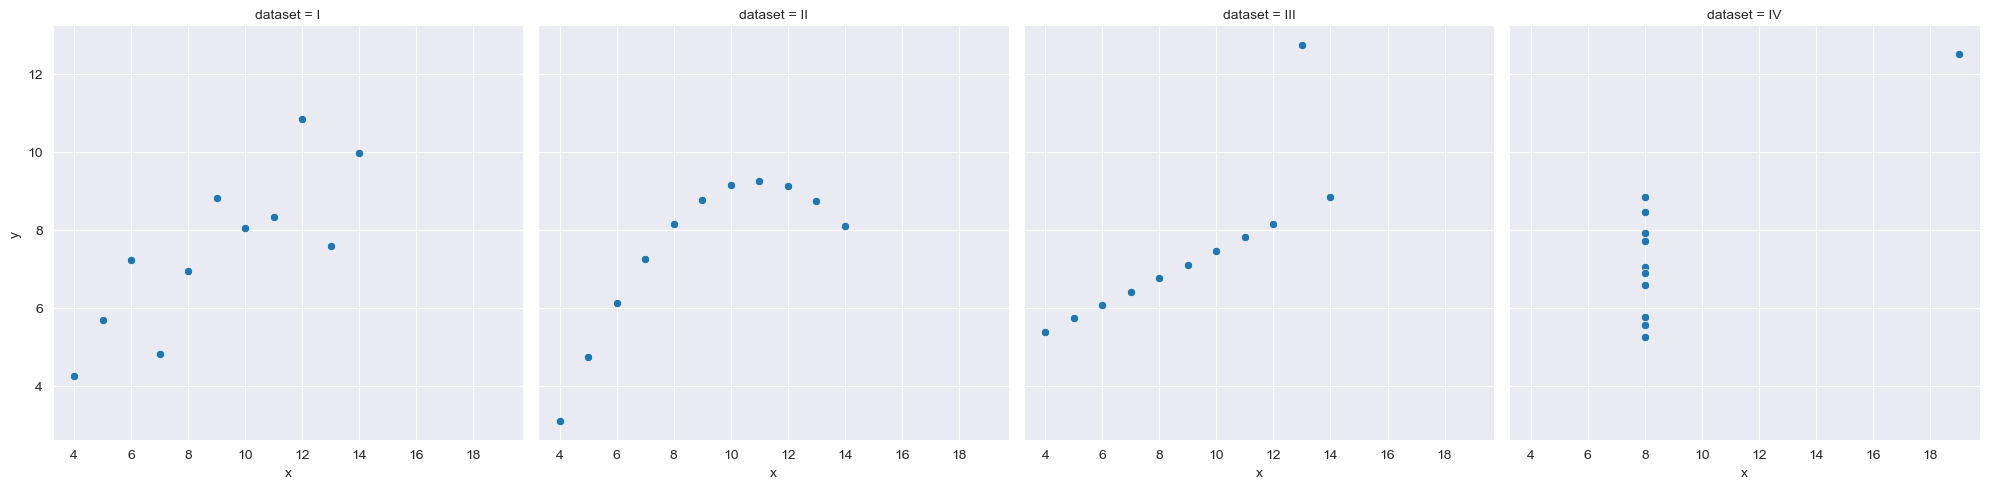

In [12]:
sns.relplot(data = num, x = 'x', y = 'y', col = 'dataset', kind = 'scatter');

## Motivative example 3: Exam score

Discover an unusual pattern that we never expected to see:

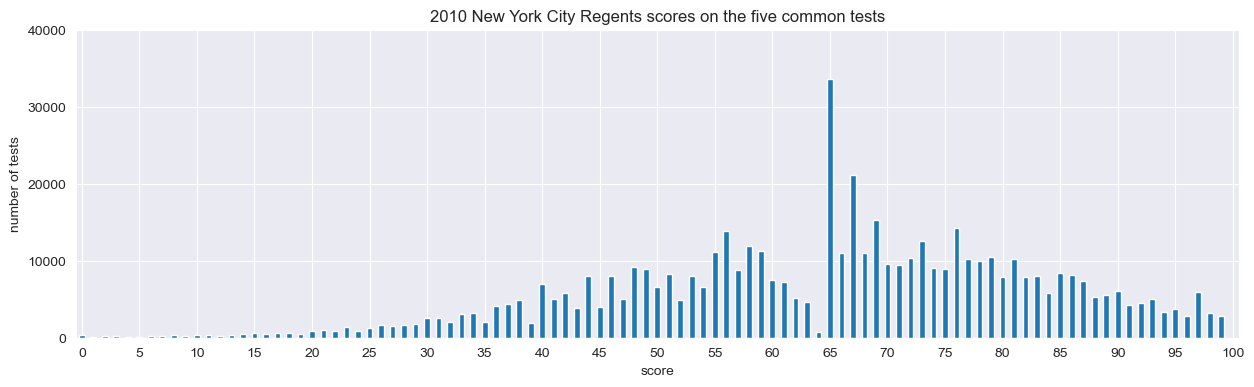

In [13]:
score = pd.read_csv('data/score.csv', usecols=list(range(1,7)))
score = score.iloc[:-1,].fillna(0).astype(int).set_index('score')
freq = score.sum(axis = 1)
freq.plot.bar(figsize=(15, 4), ylabel = 'number of tests', rot=0, 
              title='2010 New York City Regents scores on the five common tests',
              xticks=np.arange(0, 101, 5), yticks=np.arange(0, 40001, 10000));

## Exam score (continue)

We may not be able to discover the unusual pattern from the descriptive statistics:

In [14]:
pd.DataFrame(np.repeat(score.index, freq)).describe().T

,count,mean,std,min,25%,50%,75%,max
score,544671.0,64.434172,18.113133,0.0,53.0,66.0,78.0,99.0


## Why visualisation?

* We tend to see patterns / structure of data much more easily by visual means than looking at raw numbers
* Descriptive statistics may not be adequate for us to understand the data
* Identify hidden patterns and trends
    * "The greatest value of a picture is when it forces us to notice what we never expected to see." - John Tukey

Visualisation complements statistics. Both descriptive statistics and visualisation should be used to help us to understand the data.


## Visualisation goals

* Exploratory: Understand your data / results 
    * Key part of exploratory data analysis (EDA)
    * Evaluate model performance
    * Audience: yourself
    * Tool you use while thinking - not worry too much about the formatting, etc.

Visualisation for EDA is the main focus this week.

## Visualisation goals (continue)

* Explanatory: Communicate results to others 
    * Explain and inform
    * Provide evidence and support 
    * Audience: Others
    * Tool you use to influence and persuade - highly editorial and selective 
    
Visualisation for explanatory will be covered in week 11.

## Visualisation for explanatory

Examples from Economist:

<center><img src="figs/Economist.png" width="700"  align="center"/></center>

* Meaningful use of colour, carefully chosen scale
* Annotate things readers should notice
* Professing looking and eye catching

# Exploratory data analysis

## Exploratory data analysis

* Exploratory data analysis (EDA) is an approach of analysing datasets to:
    * Summarise their main characteristics, often by visualising the data
    * Understand the data beyond the formal modeling or hypothesis testing
* EDA is different from _initial data analysis_ (IDA)
    * IDA: Process of data inspection - check the quality of data, handle issues with the data, etc.

## Why EDA?

* See patterns in the data, understand the data further
* Support the selection of appropriate statistical tools and techniques
* Find violations of model assumptions
* Provide a basis for statistical inference

## Types of visualisations

* Distribution: how a variable in the dataset distributes over a range of possible values
* Comparison: how multiple variables compare
* Relationship: how the values of variables in the dataset relate
* Trend: how values evolve over time


# Distribution

## Plots for distribution

* Categorical data:
    * Bar chart
* Numerical data
    * Rug plot
    * Histogram and density plot
    * Box plot and violin plot

## Bar chart

A bar chart is commonly used to display the distribution of _categorical_ data.
* The rectangular bars with heights or lengths proportional to the number of observations for the corresponding category
    * Width does not represent the property of the data
* Example (Gender of the Titanic's passengers):

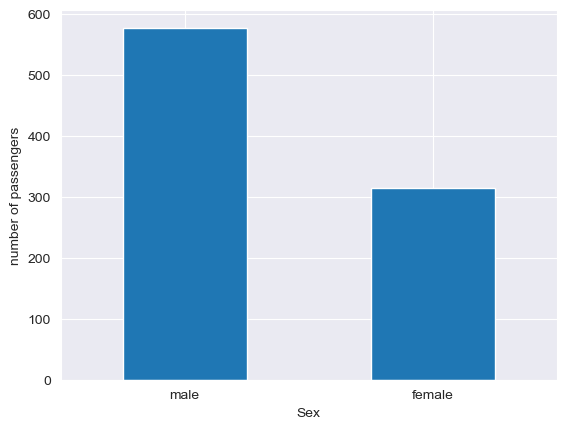

In [15]:
titanic.value_counts('Sex').plot.bar(ylabel = 'number of passengers', rot=0);

## Pie chart

A pie chart is another commonly used chart to show the distribution of categorical data.
* The arc length of each slice (or its angle and area) is proportional to the number of observations for the corresponding category
* Example (gender of the Titanic's passengers):

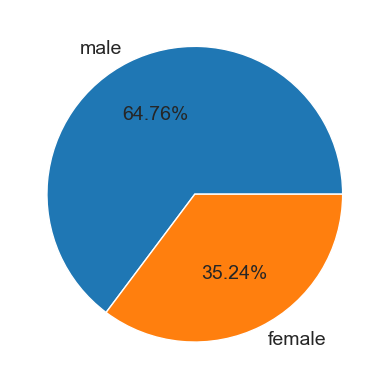

In [16]:
titanic.value_counts('Sex').plot(kind='pie', legend=False, ylabel='',
                                 autopct=lambda p:f'{p:.2f}%', textprops={'fontsize': 14});

## Pie chart?

While pie charts are widely used in the business world and the mass media, use them with care as they are harder to read directly, especially when original number or percentage is not displayed.
* Example:

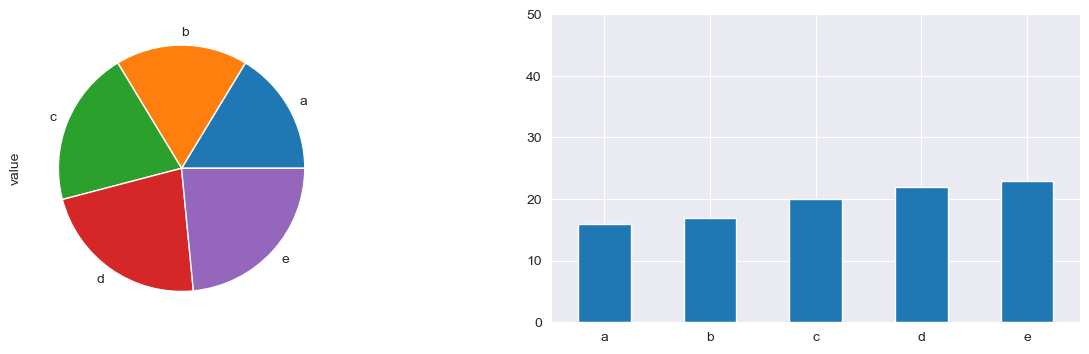

In [17]:
pie_data = pd.DataFrame({'value':[16,17,20,22,23]}, index = ['a','b','c','d','e'])
_, ax = plt.subplots(1, 2, figsize = (15, 4))
pie_data.plot(kind = 'pie', y = 'value', legend = False, ax = ax[0]);
pie_data.plot.bar(ax = ax[1], legend = False, ylim = (0, 50), rot=0);

Can you tell from the pie chart whether `d` or `e` is larger? How about from the bar chart created using the same data?

## Why pie chart may not be effective?

Human are better at some visual encodings than others. For example:
* Human are better in comparing lengths from the baseline than areas or angles
* Human are better in comparing heights with the same baseline than a moving baseline

This is related to _perceptual effectiveness_. We will talk more about it in the workshop.

## Rug plot

Rug plot simply maps the data to locations on an axis.
* It helps to show the distribution of a single quantitative variable
* It shows us each and every value
* Example:

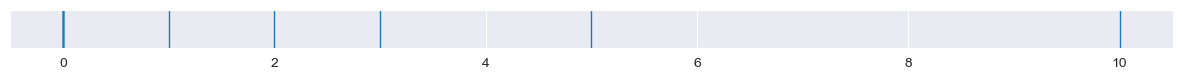

In [18]:
rug_data = [0, 2, 0, 0, 3, 0, 1, 0, 5, 10]
plt.subplots(figsize = (15, 0.5))
g = sns.rugplot(rug_data, height=1);
g.set(ylim=(0, 1), yticks=[]);

Note the y-axis does not represent the property of the data.

## Rug plot: possible issues

Consider the rug plot created using the data about the age of the Titanic's passengers:

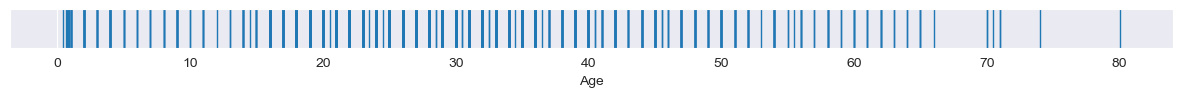

In [19]:
plt.subplots(figsize = (15, 0.5))
g = sns.rugplot(titanic['Age'].sort_values(), height=1);
g.set(ylim=(0, 1), yticks=[]);

Some issues:
* Too much details: No need to know each value
* _Overplotting_: Cannot tell how many observations for each mark is representing

## Rug plot: possible alternative

We could use spike plot, which maps the data to positions on x axis, with the height to represent the frequency of the occurrences of the corresponding value.
* Example (age of the Titanic's passengers):

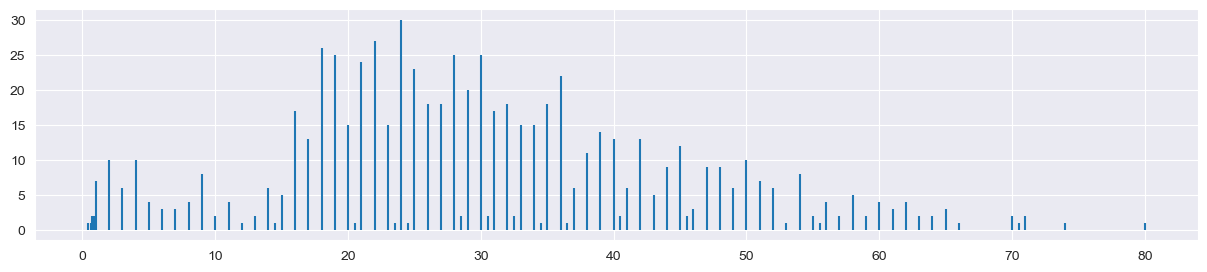

In [20]:
fare = titanic['Age'].value_counts()
plt.subplots(figsize = (15, 3))
plt.stem(fare.index, fare.values, markerfmt=' ', basefmt=' ');

But like rug plot, spike plot can still have too much details which makes it difficult to generalise and interpret the graph.

## Histogram

Histogram is another type of plot which is used to show the distribution of a single quantitative variable.
* Like spike plot, it can use height to represent frequency
* Unlike spike plot, instead of counting (and plotting) the occurrences for each value, it groups values to some intervals ("bins") and counts how many observations fall into each bin
    * Lose details but see the big picture
* Example (age of the Titanic's passengers):

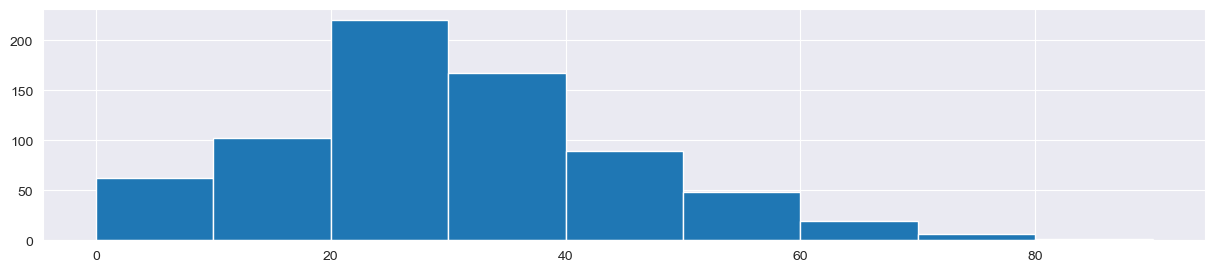

In [21]:
plt.subplots(figsize = (15, 3))
heights, bins, _ = plt.hist(titanic['Age'], bins = list(range(0, 100, 10)));

## Histogram: some properties

* When the bins are of equal size, the height of the rectangles represents the frequency of the values in the corresponding bin
* Verify the height is equal to the number of values in that bin for our example above:
    * Height of the rectangles:

In [22]:
heights

array([ 62., 102., 220., 167.,  89.,  48.,  19.,   6.,   1.])

* Number of observations inside each interval [left, right) (except the last one to be [left, right]):

In [23]:
[sum(titanic['Age'].between(bins[i], bins[i+1], inclusive = 'left')) 
 for i in range(len(bins)-1)]

[62, 102, 220, 167, 89, 48, 19, 6, 1]

## Histogram: relative frequency

Histogram can be "normalised" to display _relative_ frequency, with the sum of the area of all rectangles is 1.
* Can be considered as an approximate representation of the probability density of the data
    * Area of each rectangle represents the empirical probability of observations in the corresponding interval (bin) indicated by the x axis
* Example (age of the Titanic's passengers):

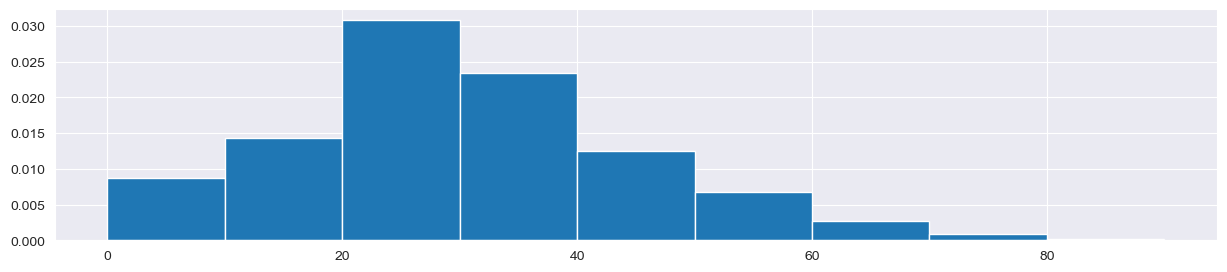

In [24]:
plt.subplots(figsize = (15, 3))
heights, bins, _ = plt.hist(titanic['Age'], bins = list(range(0, 100, 10)), density=True);

## Histogram: area and probability

* Verify the sum of the area of all rectangles is 1 in our example, when the histogram is normalised:

In [25]:
sum(heights*10) # 10 is the bin width

0.9999999999999999

* Example: What is the proportion that passengers with $20 \le age < 40$?

In [26]:
heights[2]*10 + heights[3]*10 

0.5420168067226891

## Histogram: effect of number of bins

Different number of bins affects how the estimated probability density looks.
* The higher number of bins, the more detailed the histogram is
* Beware of drawing strong conclusions from the looks of a histogram

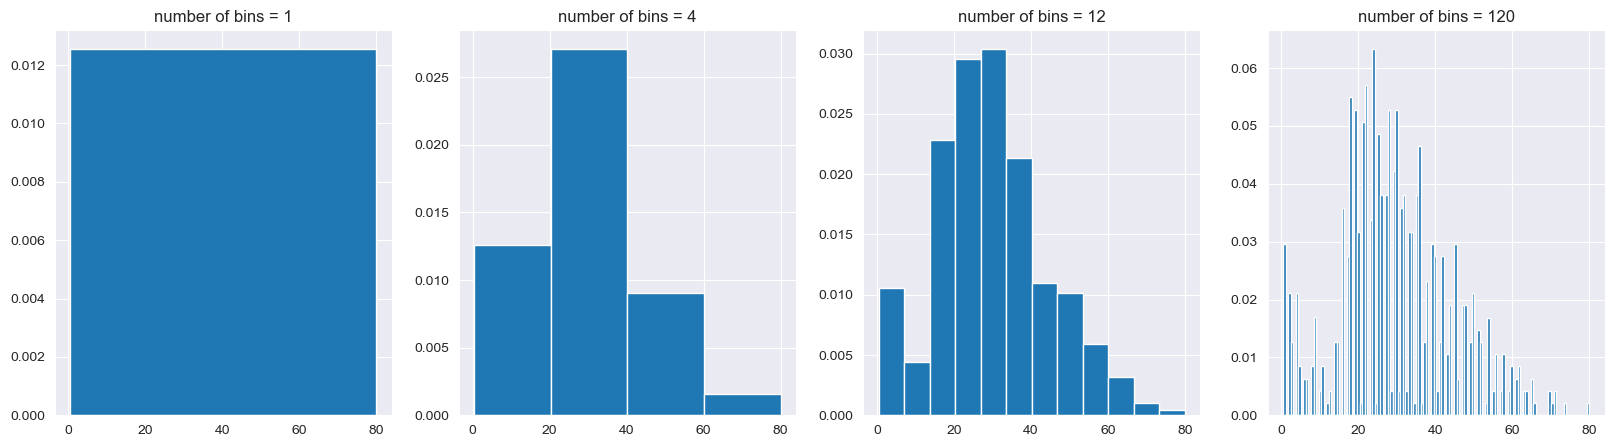

In [27]:
_, ax = plt.subplots(1, 4, figsize = (20, 5))
for i, bins in enumerate(np.array([1, 4, 12, 120])):
    ax[i].hist(titanic['Age'], bins = bins, density = True)
    ax[i].set_title(f'number of bins = {bins}')

## Histogram: different bin widths

Bins do not necessarily have the same width.
* Example (age of the Titanic's passengers, with age $[0,1)$ as first the first bin and $[50, 100]$ the last bin:

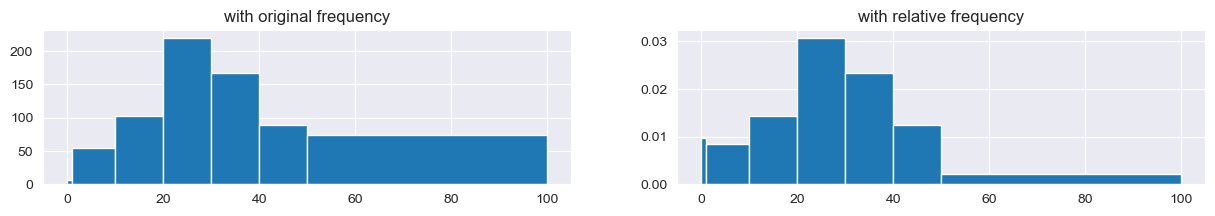

In [28]:
_, ax = plt.subplots(1, 2, figsize = (15, 2))
bins = [0,1,10,20,30,40,50,100]
ax[0].hist(titanic['Age'], bins=bins);
ax[0].set_title('with original frequency'); 
ax[1].hist(titanic['Age'], bins=bins, density=True);
ax[1].set_title('with relative frequency');

* Without normalisation, the _height_ of the histogram represents the frequency for values fall into the bins
    * Can be misleading, better not to do it!
* With normalisation, the _area_ of the histogram represents the probability for values fall into the bins

## Density plot

Instead of visualising the probability density discretely by histogram, density plot can be used to get a smooth estimation.
* Example (age of the Titanic's passengers using kernel density estimation (KDE)):

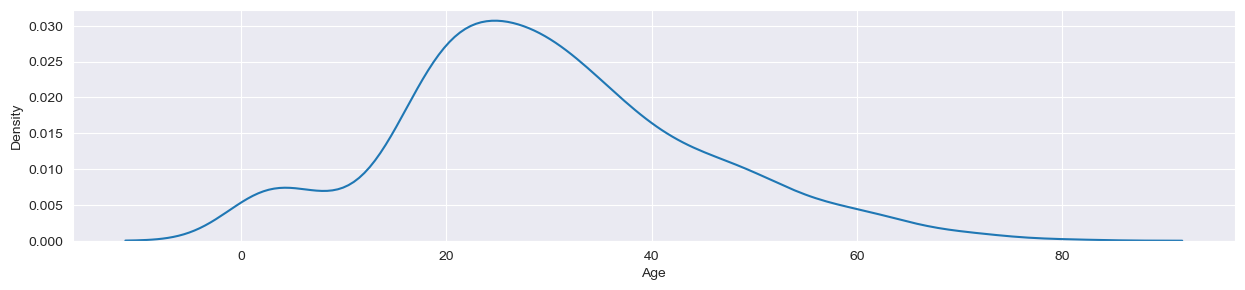

In [29]:
plt.subplots(figsize = (15, 3))
sns.kdeplot(titanic['Age']);

## KDE: how does it work?

Consider the following data:

In [32]:
kde_data = [0, 1, 3, 4, 5]

Place a density function like from the normal distribution (or the _Gaussian kernel_) on each of the data point, with mean the same as the data point, and a given standard deviation (here we use $1$).
* Calculate the Gaussian kernel:

In [33]:
from scipy import stats
x_values = np.linspace(-3, 8, 100)
y_pdf = np.array([stats.norm.pdf(x_values, loc=mu, scale=1) for mu in kde_data])
y_pdf = pd.DataFrame(y_pdf.T, index=x_values)

## KDE: how does it work? (continue)

* Graphical illustration:

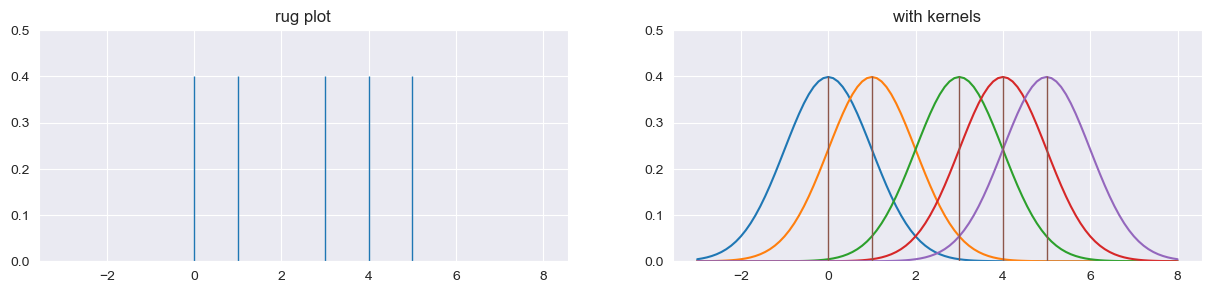

In [34]:
_, ax = plt.subplots(1, 2, figsize = (15, 3), sharex = True)
sns.rugplot(kde_data, ax = ax[0], height=0.8)
y_pdf.plot(ax = ax[1], legend = False)
sns.rugplot(kde_data, ax = ax[1], height=0.8)
ax[0].set(ylim=(0, 0.5), title='rug plot')
ax[1].set(ylim=(0, 0.5), title='with kernels');

## KDE: how does it work? (continue)

We then normalise the density and sum them together:

In [35]:
normalised_pdf = y_pdf/5
kde = normalised_pdf.sum(axis = 1)

Visualise the KDE:

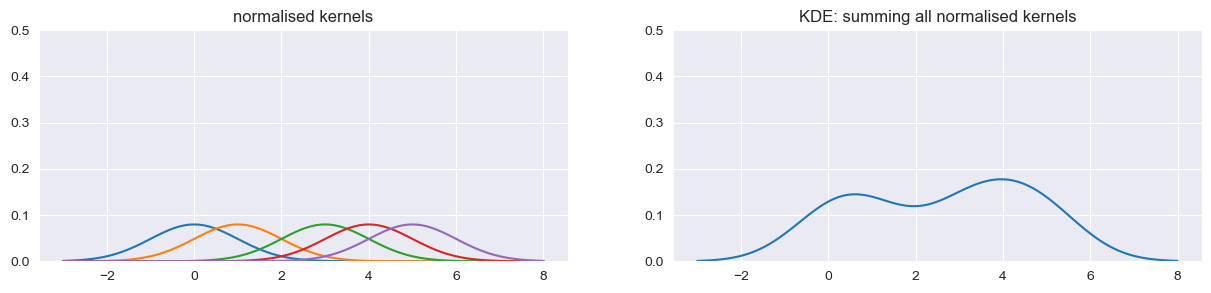

In [36]:
_, ax = plt.subplots(1, 2, figsize = (15, 3), sharex = True)
normalised_pdf.plot(ax = ax[0], legend = False)
kde.plot(ax = ax[1])
ax[0].set(ylim=(0, 0.5), title='normalised kernels')
ax[1].set(ylim=(0, 0.5), title='KDE: summing all normalised kernels');

## KDE: Effect of setting the standard deviation

The standard deviation controls the smoothness of the KDE, similar to how the number of bins control the amount of details we can see for a histogram. For example:

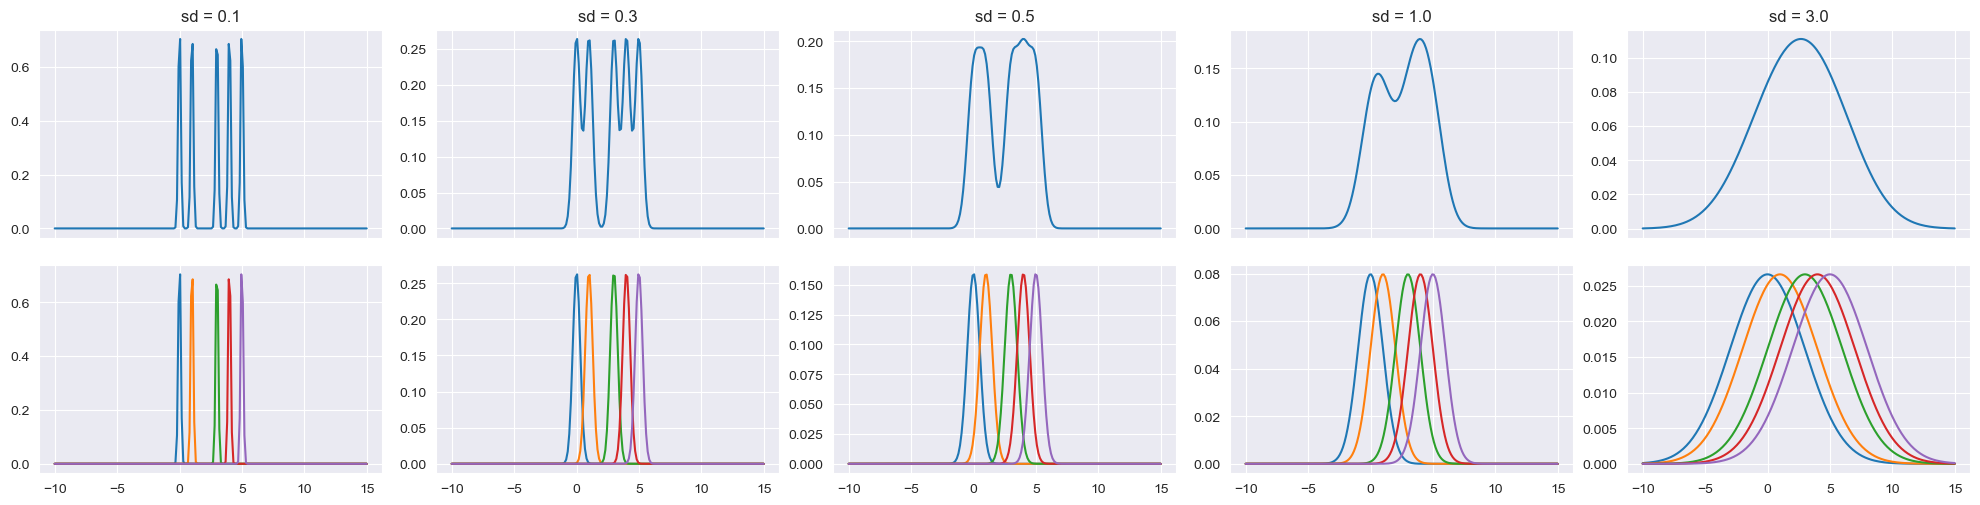

In [37]:
x_values = np.linspace(-10, 15, 200)
fig, ax = plt.subplots(2, 5, figsize = (20, 5), sharex = True)
fig.tight_layout()
for i, sd in enumerate(np.array([0.1, 0.3, 0.5, 1, 3])):
    y_pdf = np.array([stats.norm.pdf(x_values, loc=mu, scale=sd) for mu in kde_data])
    normalised_pdf = pd.DataFrame(y_pdf.T, index=x_values)/5
    normalised_pdf.sum(axis = 1).plot(ax = ax[0,i], title=f'sd = {sd}')
    normalised_pdf.plot(ax = ax[1,i], legend = False);

## KDE: Effect of setting the smoothing parameter

Obverse how the smoothing parameter (`bw_adjustment`) affects the density plot using the age of the Titanic's passengers data:

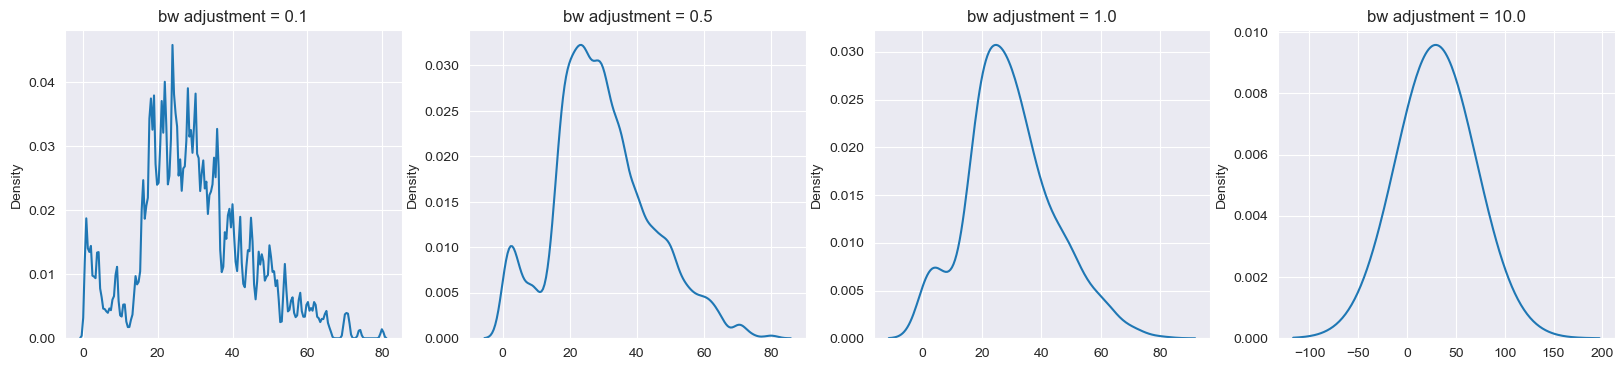

In [38]:
_, ax = plt.subplots(1, 4, figsize = (20, 4))
for i, bw_adj in enumerate(np.array([0.1, 0.5, 1, 10])):
    g = sns.kdeplot(titanic['Age'], ax = ax[i], bw_adjust = bw_adj)
    g.set(title = f'bw adjustment = {bw_adj}', xlabel = '');

## What we can see from distribution plots?

From the distribution plots, we can see some characteristics of the distributions like:
* Location and spread
* Modes
* Skewness

## Mode

A mode of a distribution is a local or global maximum. 
* _Unimodal_: A distribution with a single clear maximum
* _Bimodal_: A distribution with two modes
* _Multimodal_: More than two modes

## Mode: Examples

Here we use some dummy data to illustrate unimodal, bimodal and multimodal:

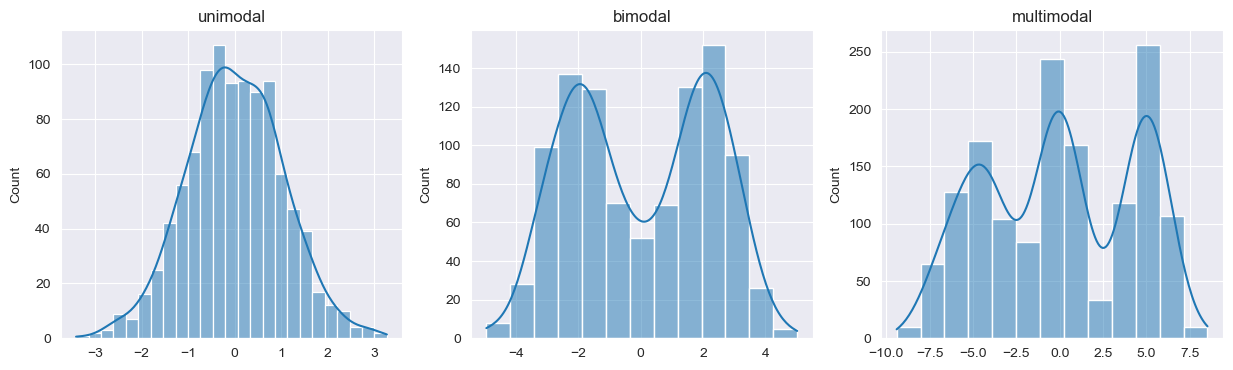

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(np.random.normal(size=1000), ax=ax[0], kde=True).set_title('unimodal')
sns.histplot(np.hstack([np.random.normal(loc=-2, size=500), 
                        np.random.normal(loc=2, size=500)]), 
             ax=ax[1], kde=True).set_title('bimodal')
sns.histplot(np.hstack([np.random.normal(loc=-5, scale=1.5, size=500), 
                        np.random.normal(loc=0, size=500), 
                        np.random.normal(loc=5, size=500)]),
             ax=ax[2], kde=True).set_title('multimodal');

## Mode: Titanic example

Is the distribution of age of Titanic's passengers unimodal? Bimodal? Or multimodal?

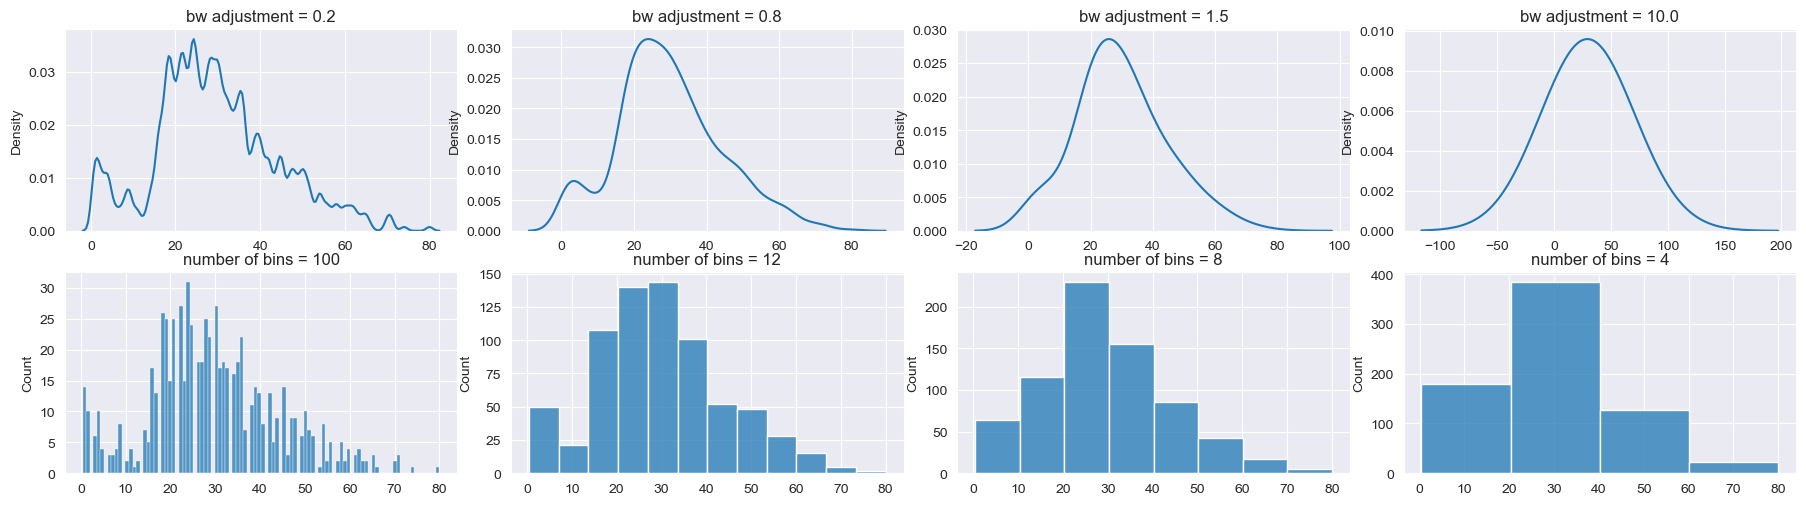

In [40]:
bw_adj = np.array([0.2, 0.8, 1.5, 10])
bins = np.array([100, 12, 8, 4])
fig, ax = plt.subplots(2, 4, figsize = (18, 5))
fig.tight_layout()
for i in range(4):
    g1 = sns.kdeplot(titanic['Age'], ax = ax[0,i], bw_adjust=bw_adj[i])
    g1.set(title=f'bw adjustment = {bw_adj[i]}', xlabel='')
    g2 = sns.histplot(titanic['Age'], ax = ax[1,i], bins=bins[i])
    g2.set(title=f'number of bins = {bins[i]}', xlabel='');

## Skewness

* Right skewed: a distribution has a long right tail
    * Mean is typically to the right of the median
* Left skewed: a distribution has a long left tail
    * Mean is typically to the left of the median
* Symmetric: both tails are of equal size

## Skewness: examples

Here we use some dummy data to illustrate right skewed, left skewed and symmetric:

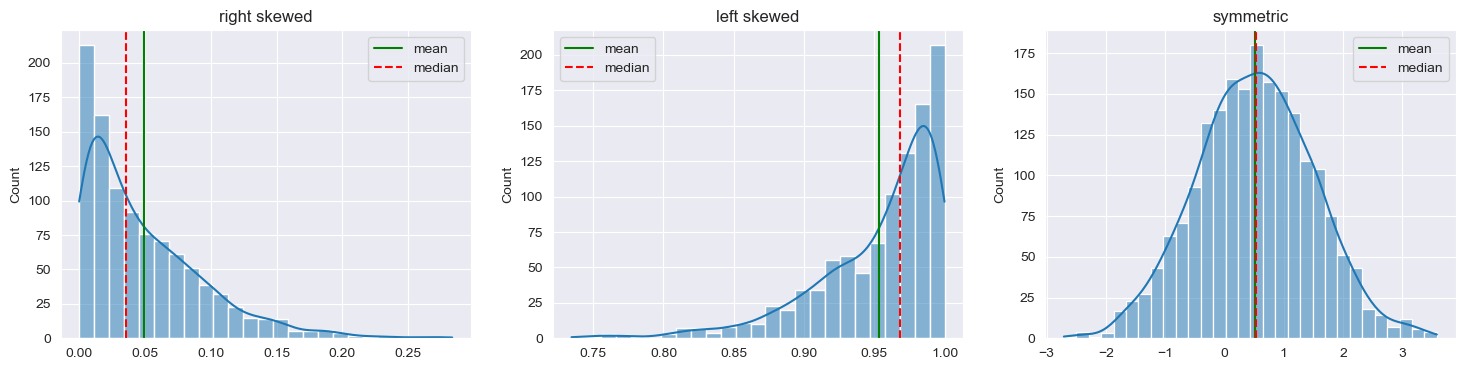

In [41]:
skewness_data = {'right skewed': np.random.beta(1, 20, size = 1000),
                 'left skewed': np.random.beta(20, 1, size = 1000),
                 'symmetric': np.random.normal(loc = 0.5, size = 2000)}   
_, ax = plt.subplots(1, 3, figsize = (18, 4))
for i, lab in enumerate(skewness_data):
    sns.histplot(skewness_data[lab], ax = ax[i], kde=True).set_title(lab);
    ax[i].axvline(x = skewness_data[lab].mean(), color = 'green')
    ax[i].axvline(x = np.median(skewness_data[lab]), color = 'red', linestyle = '--')
    ax[i].legend(ax[i].get_lines()[-2:], ['mean', 'median'])

## Box plot

Box plots is another type of visualisation for distribution of numerical variables, but it summarises several characteristics of a distribution by some summary statistics, for which they are graphically represented by:
* Box: graphically demonstrate locality, spread and skewness of numerical data through their quartiles:
    * First quartile ($Q_1$)
    * Median
    * Third quartile ($Q_3$)
* Whiskers: extend from the box indicating variability outside the $Q_1$ and $Q_3$
    * There are a few ways to specify how to calculate the whisker boundary. One commonly used: 
        * Lower boundary: $Q_1 - 1.5 IQR$, Upper boundary: $Q_3 + 1.5 IQR$
* Outliers: All other observations outside the boundary of the whiskers
    
Note the width of the box does not represent the property of the data.

## Box plot (continue)

Annotated plot:

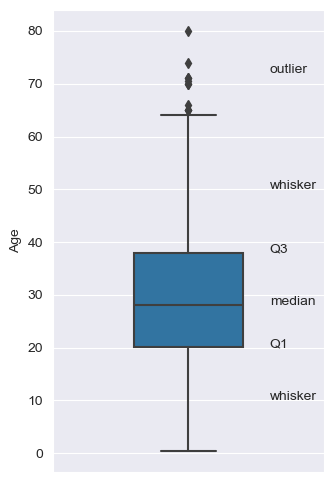

In [42]:
_, ax = plt.subplots(figsize = (3.5, 6))
sns.boxplot(y = titanic['Age']).set_xlim(-1,1)
for q, lab in zip([0.25, 0.5, 0.75], ['Q1', 'median', 'Q3']):
    plt.annotate(lab, (0.6, titanic['Age'].quantile(q)))
plt.annotate('whisker', (0.6, 50)); plt.annotate('whisker', (0.6, 10)); 
plt.annotate('outlier', (0.6, 72)); 

## Box plot: advantages

* Box plot provides a compact summary of a distribution, can easily observe:
    * Central tendency: via median line
    * Variability: via length of the box and the whiskers
    * Skewness: via the relative location of median line in the box, and/or the relative length of the upper and lower whiskers
    * Amount of extreme values

## Box plot vs histogram
* Example (age of passengers of Titanic):

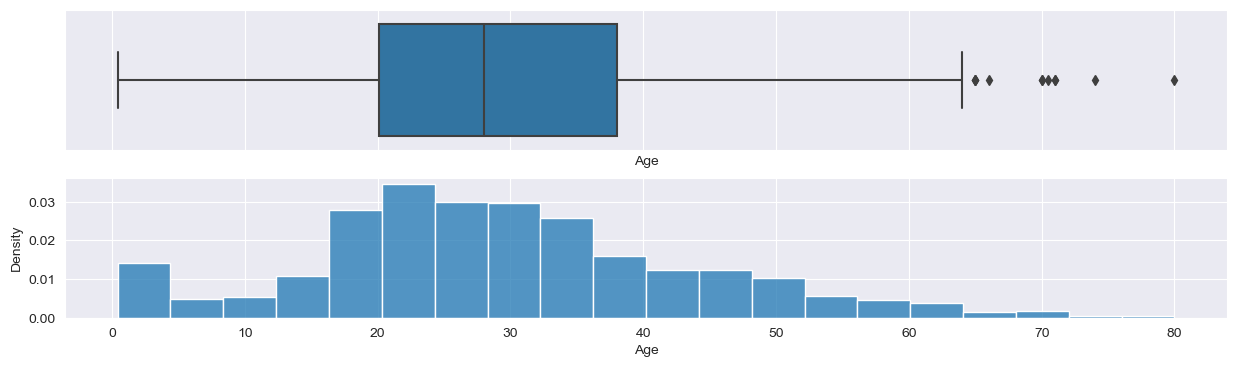

In [43]:
_, ax = plt.subplots(2,1, figsize=(15, 4), sharex = True)
sns.boxplot(x=titanic['Age'], ax=ax[0])
sns.histplot(x=titanic['Age'], ax=ax[1], stat='density');

## Box plot: possible problems

* With box plot, we roughly summarise the data with only 5 statistics - A lot of information is lost!
    * Consider the following example data from [here](https://stats.stackexchange.com/questions/137965/box-and-whisker-plot-for-multimodal-distribution):

In [44]:
box_data = pd.read_csv('data/boxplot_dummy.csv')
box_data.head(3)

,x1,x2,x3,x4
0,1.000000,1.000000,1.000000,1.0
1,2.017711,7.100000,1.261224,7.4
2,2.675638,7.158191,1.522449,7.4


## Box plot: possible problems (continue)

The 4 sets of data provide very similar boxplots:

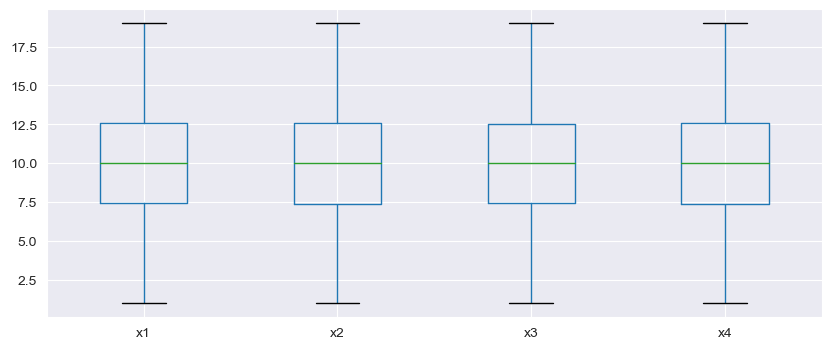

In [45]:
box_data.boxplot(figsize = (10, 4));

## Box plot: possible problems (continue)

But they are vastly different if we use KDE and histogram to visualise them:

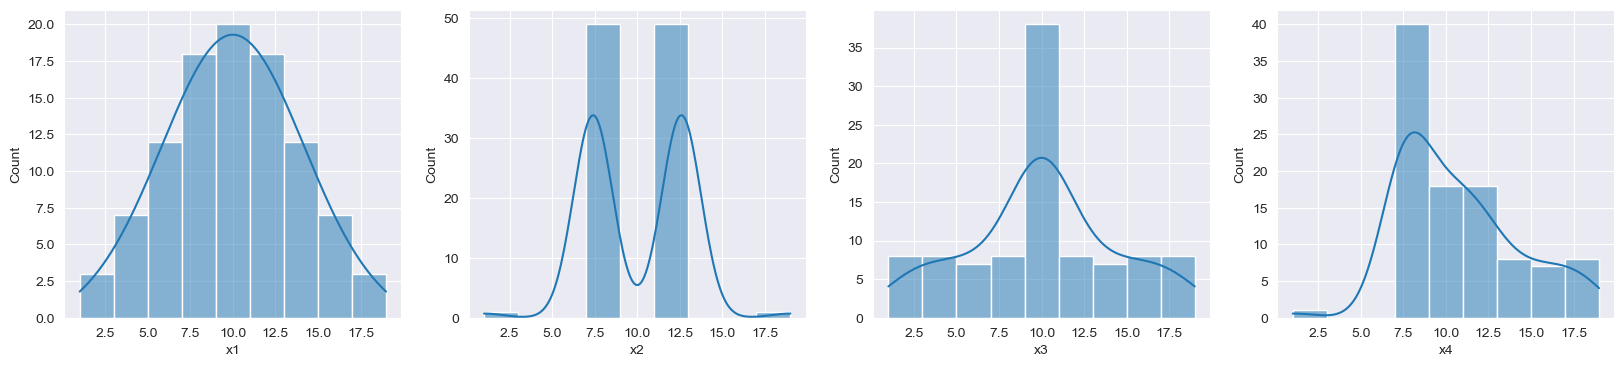

In [46]:
_, ax = plt.subplots(1, 4, figsize = (20, 4))
for i, label in enumerate(np.array(['x1', 'x2', 'x3', 'x4'])):
    sns.histplot(box_data[label], kde = True, ax = ax[i]);

## Violin plot
Violin plot is another type of visualisation for distribution of numerical variables, and it can be considered as a combination of box plot and kernel density plot.
* Like box plot, it can show the three quartiles and whiskers
* Like kernel density plot, it shows the approximated distribution

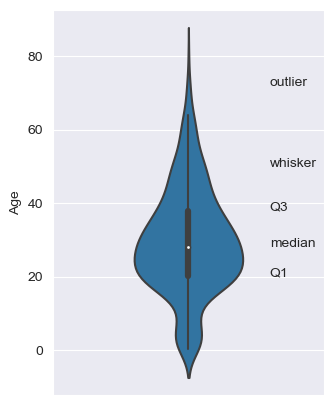

In [47]:
plt.subplots(figsize = (3.5, 5))
sns.violinplot(y = titanic['Age']).set_xlim(-1,1)
for q, lab in zip([0.25, 0.5, 0.75], ['Q1', 'median', 'Q3']):
    plt.annotate(lab, (0.6, titanic['Age'].quantile(q)))
plt.annotate('whisker', (0.6, 50)); plt.annotate('outlier', (0.6, 72));

## Violin plot (continue)

Violin plots can show the difference in distribution that box plots fail to for the previous dataset:

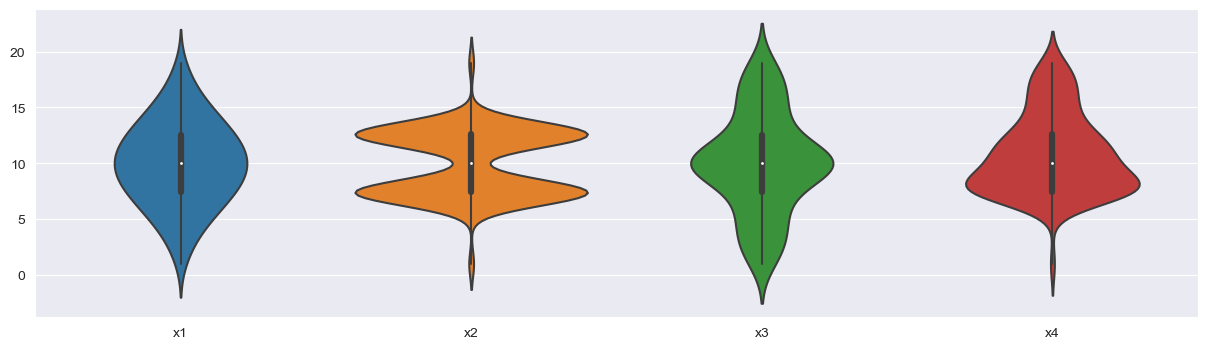

In [48]:
plt.subplots(figsize = (15, 4))
sns.violinplot(data = box_data);

# Comparing distributions

## Side-by-side bar chart

Side-by-side bar chart allows you to simultaneously compare the distribution of a categorical variable conditioning on another categorical variable.

* It allows you to compare each sub group directly
* Example (Number of survived / not survived passengers of Titanic by ticket class):

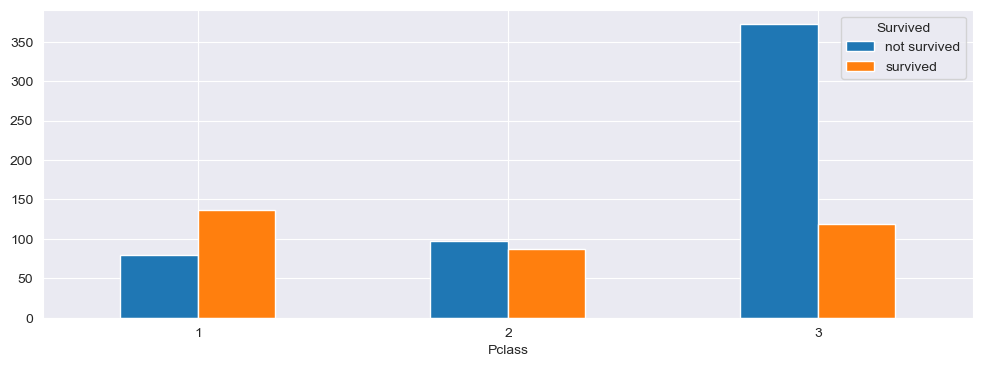

In [49]:
survived = titanic.pivot_table(index='Pclass', columns='Survived', values='Sex', 
                               aggfunc='count')
survived.plot(kind='bar', figsize=(12, 4), rot=0);

## Stacked bar chart

Stacked bar chart allows you to simultaneously compare the distribution of a categorical variable conditioning on another categorical variable.
* Comparing with side-by-side bar chart, it focuses more on part-to-whole relation
* Example (Number of survived / not survived passengers of Titanic by ticket class):

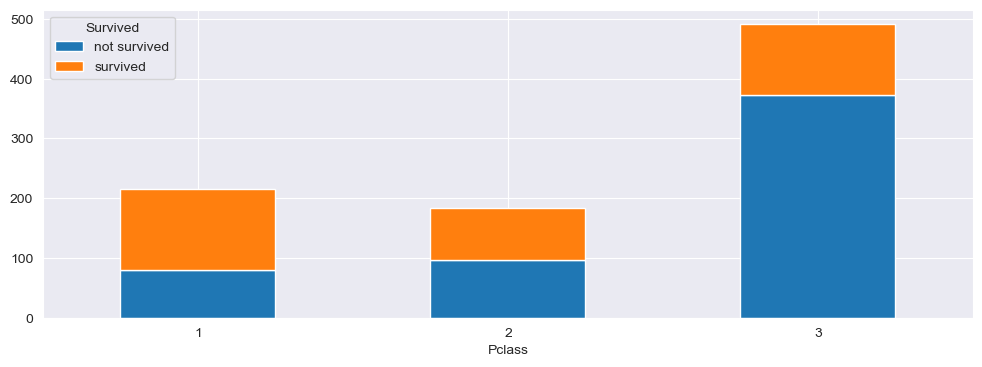

In [50]:
survived.plot(kind='bar', stacked=True, figsize=(12, 4), rot=0);

Here we can compare the distribution of ticket class like the normal bar chart, but we can also see how the distribution of survival differs due to the ticket class.

## Stacked bar chart: possible issue

Here we illustrate a possible issue with stacked bar chart with some dummy data:

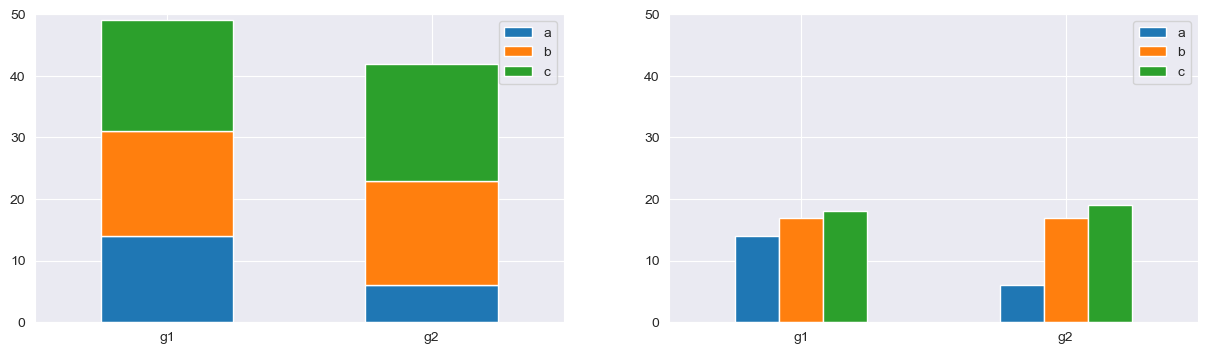

In [51]:
bar_data = pd.DataFrame({'a':[14, 6], 'b':[17, 17], 'c':[18, 19]}, index=['g1','g2'])
_, ax = plt.subplots(1, 2, figsize = (15, 4))
bar_data.plot(kind = 'bar', stacked = True, ax = ax[0], rot = 0, ylim = (0,50));
bar_data.plot.bar(ax = ax[1], rot = 0, ylim = (0,50));

Can you tell from the stacked bar chart whether `c` is larger in `g1` or `g2`? How about the unstacked bar chart created using the same data?
* Lesson: Avoid moving the baseline if possible. Human are not very good at comparing height when baseline moves

## Overlaid histograms and density curves

Overlaid histograms and density curves is one possible way to compare the distribution of different quantitative variables (or how a variable differs over specific groups).
* _Superposition_: multiple lines / plots on top of each others
* Example (compare the age of passengers in different classes):

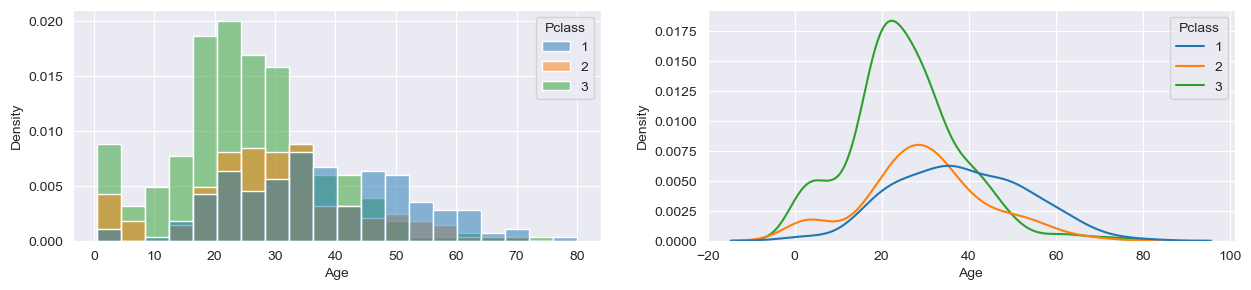

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (15, 3))
sns.histplot(data = titanic, x='Age', hue='Pclass', ax=ax[0], stat='density');
sns.kdeplot(data = titanic, x='Age', hue='Pclass', ax=ax[1]);

* Overlapping histograms can be difficult to read
* Overlapping density plots is not bad, but can be difficult to read when we have more categories

## Histograms and density curves 

Alternatively, we can plot multiple histograms and/or distribution curves on the same axes.
* _Juxtaposition_: multiple plots with the _same_ scale, displaying side by side
* Example:

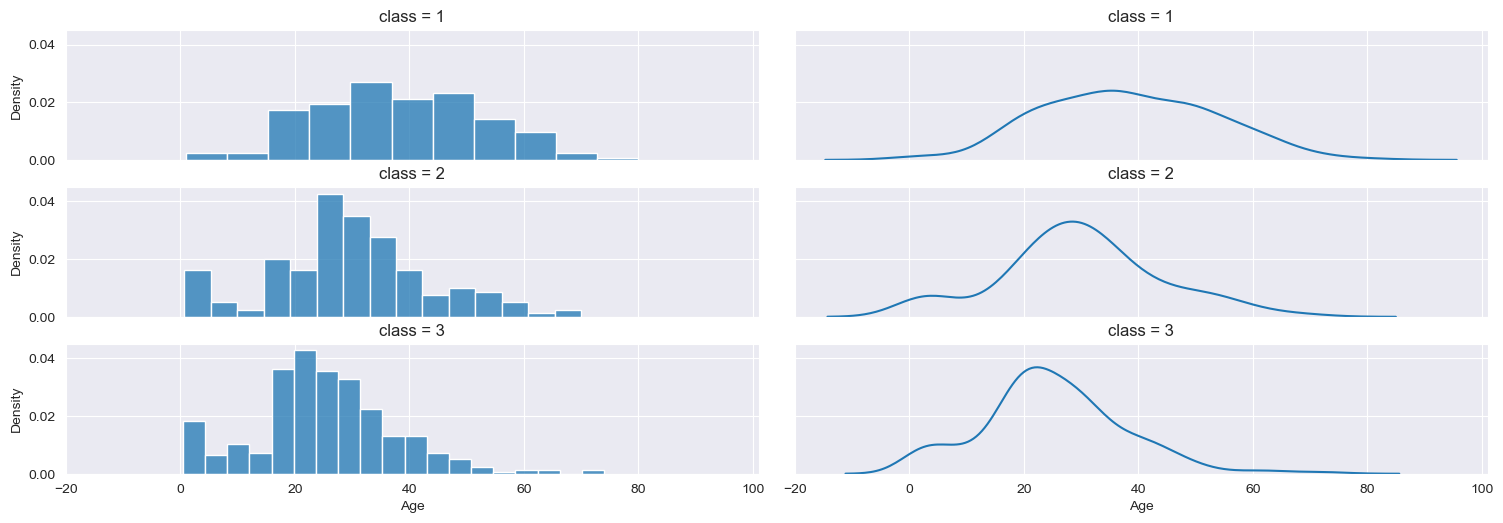

In [53]:
fig, ax = plt.subplots(3, 2, figsize = (15, 5), sharex=True, sharey = True)
plt.tight_layout()
for i in range(3):
    sns.histplot(data=titanic[titanic.Pclass==i+1], x='Age', ax=ax[i,0], stat='density')
    sns.kdeplot(data=titanic[titanic.Pclass==i+1], x='Age', ax=ax[i,1])
    ax[i,0].set(title = f'class = {i+1}')
    ax[i,1].set(title = f'class = {i+1}');

## Side by side box plots and violin plots

It may be better to compare distributions using side by side box plots or violin plots.
* Example (age vs class of passengers of Titanic):
    * 1 numerical variable (age on y axis)
    * 1 categorical variable (ticket class on x axis)

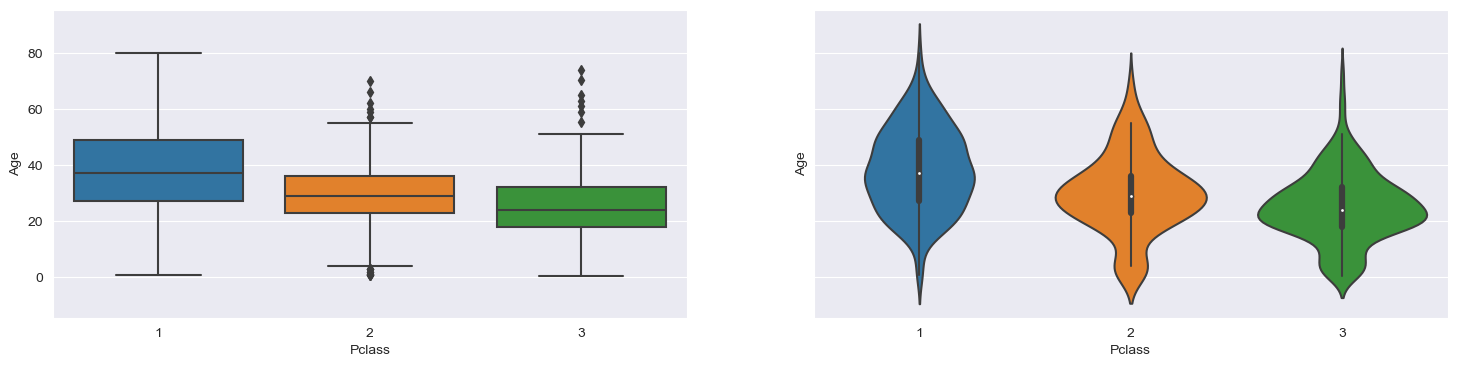

In [54]:
_, ax = plt.subplots(1, 2, figsize = (18, 4), sharey = True)
sns.boxplot(data = titanic, y = 'Age', x = 'Pclass', ax = ax[0])
sns.violinplot(data = titanic, y = 'Age', x = 'Pclass', ax = ax[1]);

At a glance, we can tell from the boxplots the median age of passenger from class 1 is higher than median age of passenger from other classes.

## Side by side box plots: advantages

* The (over)simplified visualisation provided box plot makes it useful for comparing a quantitative variable across groups
    * It highlights the range, quartiles, median and any outliers present in a data set for each group

## Split violin plot

Split violin plot allows you to display the distribution from 2 groups on different sides of the density plot.
* This allows us to explore the relations between 3 variables
    * 1 quantitative variables (y axis)
    * 2 categorical variables (x axis and both sides of the violin plot)
* Example (age vs ticket class and gender of passengers of Titanic): 

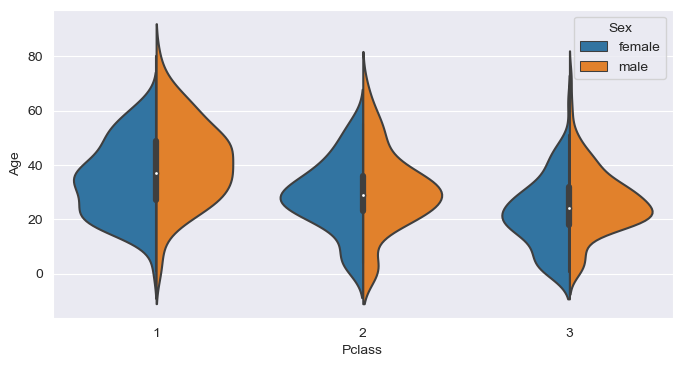

In [55]:
ax = plt.subplots(figsize=(8, 4))
sns.violinplot(data=titanic, y='Age', x='Pclass', hue='Sex', split=True, ax=ax[1]);

# Relationships between two quantitative variables

## Scatter plot

Scatter plots are used to reveal relationships between pairs of quantitative variables.
* Use Cartesian coordinates to display values for typically two variables for a set of data 
* Example:

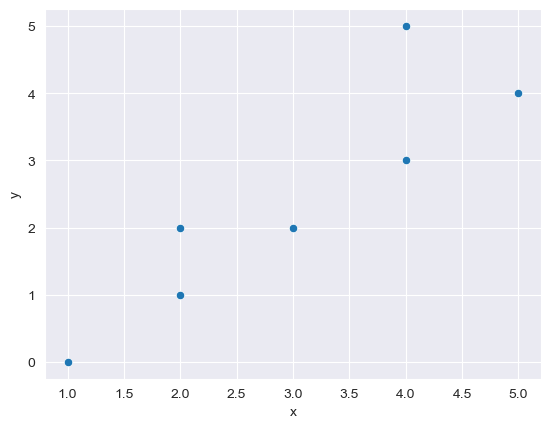

In [56]:
x = [1, 2, 4, 4, 3, 2, 5]
y = [0, 2, 5, 3, 2, 1, 4]
g = sns.scatterplot(x=x, y = y)
g.set(xlabel='x', ylabel='y');

## Scatter plot: types of relationship

Scatter plot helps us to find out if there is relationship, and the type of relationships (linear, non-linear, unequal spread).

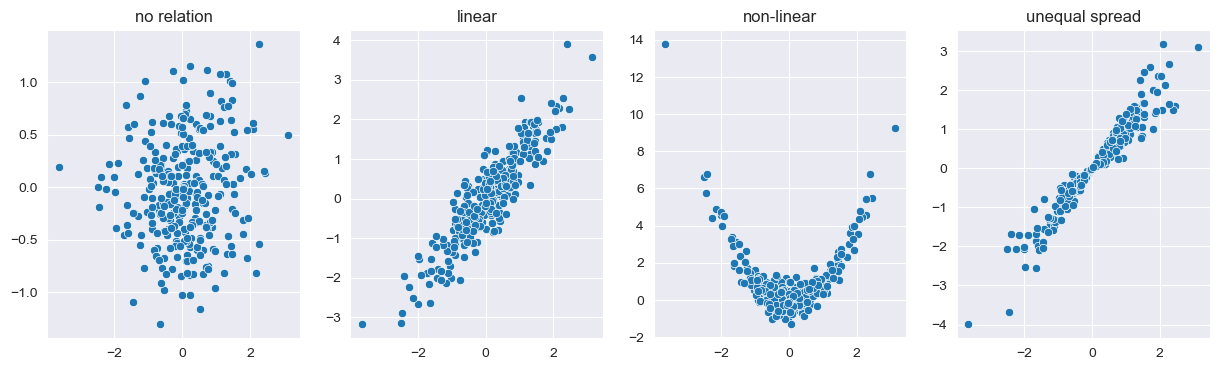

In [57]:
import numpy.random as rn
_, ax = plt.subplots(1, 4, figsize = (15, 4))
n = 300; x = rn.randn(n)
sns.scatterplot(x=x, y=rn.normal(scale=0.5, size=n), ax=ax[0]).set_title('no relation')
sns.scatterplot(x=x, y=x+rn.normal(scale=0.5, size=n), ax=ax[1]).set_title('linear')
sns.scatterplot(x=x, y=x**2+rn.normal(scale=0.5, size=n), ax=ax[2]).set_title('non-linear')
sns.scatterplot(x=x, y=x+x*rn.normal(scale=0.3, size=n), ax=ax[3]).set_title('unequal spread');

## Scatter plot: auto example

See if there is any relation between mpg and other variables like acceleration, displacement and weight in the auto dataset:

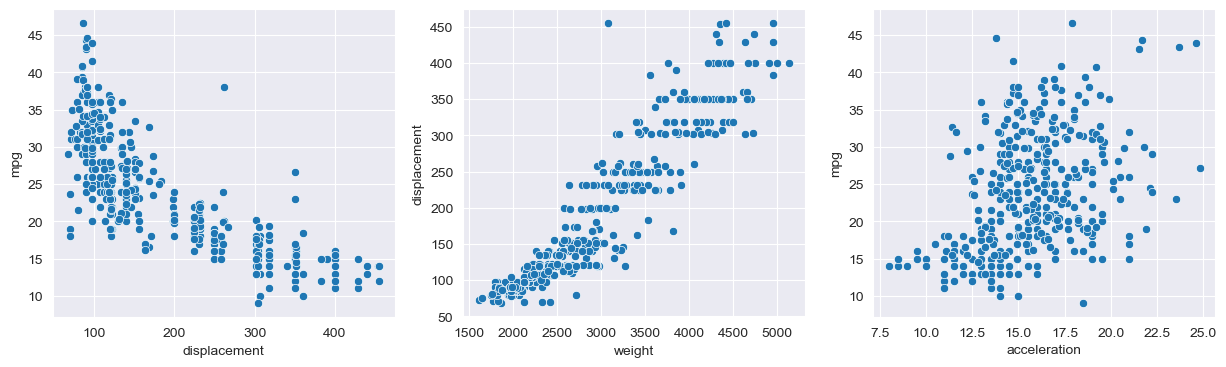

In [58]:
auto = pd.read_csv('data/auto-mpg.csv')
_, ax = plt.subplots(1, 3, figsize = (15, 4))
sns.scatterplot(data = auto, x = 'displacement', y = 'mpg', ax = ax[0]);
sns.scatterplot(data = auto, x = 'weight', y = 'displacement', ax = ax[1]);
sns.scatterplot(data = auto, x = 'acceleration', y = 'mpg', ax = ax[2]);

## Scatter plot with marginal density

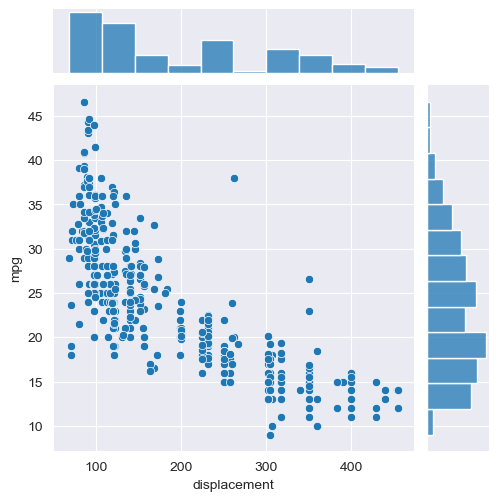

In [59]:
g = sns.jointplot(data=auto, x='displacement', y='mpg')
g.fig.set_size_inches(5,5);

## Scatter plot: possible issues

Like rug plot, scatter plots can be subjected to overplotting.
* One possible solution: smaller markers
* Another solution: 2D "histogram", density plot

(Note if we only we want to see the relations between variables, overplotting is not necessarily an issue)

## Hex plot

Hex plot is a tool to visualise the joint distribution. It divides the plane into regular hexagons, counts the number of observations fall into each hexagon, and then maps the count to the hexagon fill.
* Can be thought of as a two dimensional histogram
* More shaded hexagons typically indicate a greater density/frequency

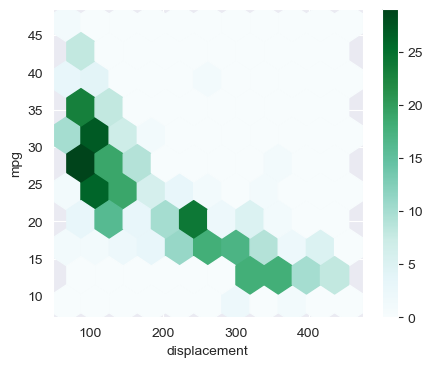

In [60]:
_, ax = plt.subplots(figsize = (5, 4));
auto.plot.hexbin(x="displacement", y="mpg", gridsize=10, ax = ax);

## Hex plot

The use of hexagon bins can:
* Avoid the visual artefacts sometimes generated by the very regular alignment of grides
* Visualise relations better

Compare the following with the hex plot in the previous slide:

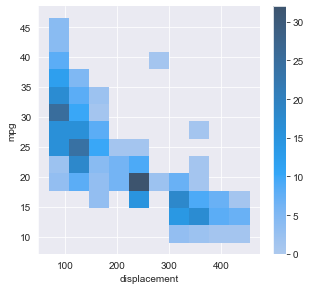

In [60]:
g = sns.displot(auto, x="displacement", y="mpg", cbar=True);
g.fig.set_size_inches(4.5,4);

## Contour plot (density plot)

Contour plots are two dimensional density plots.

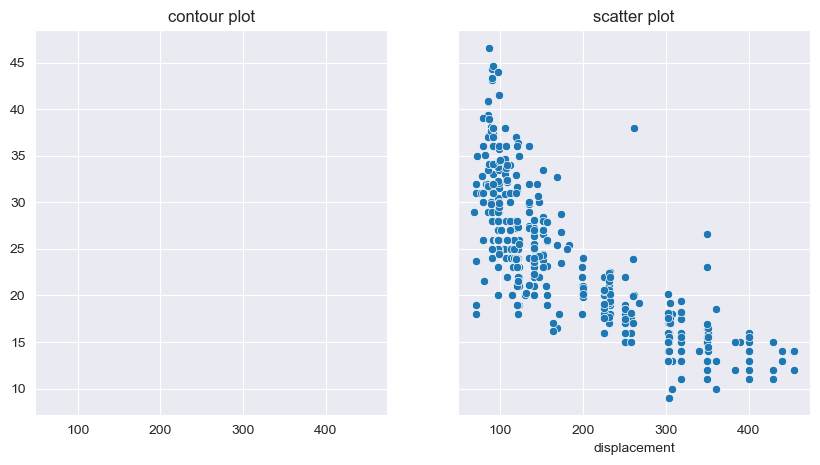

<Figure size 600x600 with 0 Axes>

In [63]:
_, ax = plt.subplots(1, 2, figsize=(10, 5), sharex = True, sharey = True)
g = sns.jointplot(data=auto, x='displacement', y='mpg', kind='kde', fill=True, ax=ax[0])
g.ax_marg_x.remove(); g.ax_marg_y.remove()
sns.scatterplot(data=auto, x='displacement', y='mpg', ax=ax[1])
ax[0].set(title='contour plot'); ax[1].set(title='scatter plot')
plt.clf();

# Trend

## Line plot

A line plot is a type of chart which displays ordered data connected by straight line segments.
* For time series data, often we plot data against time to see if there is any trend in the data
    * Example: coronavirus cases in the UK

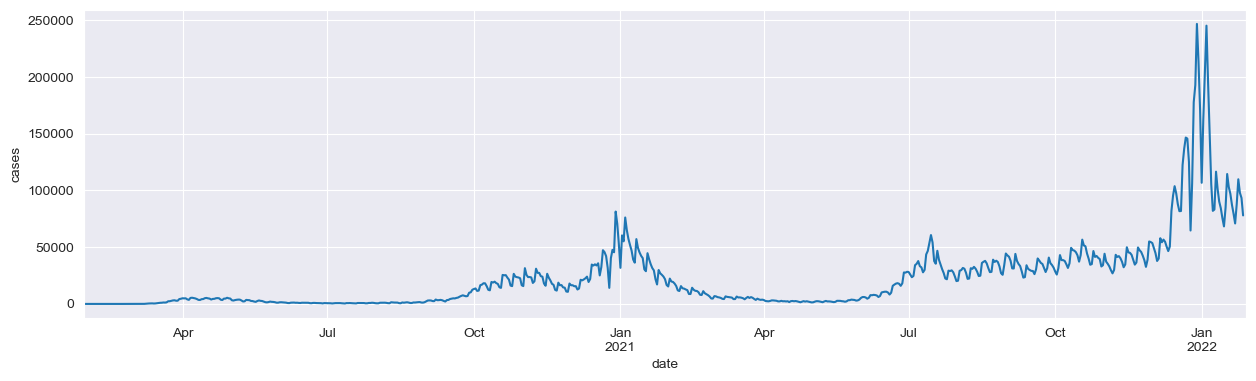

In [64]:
cases = pd.read_csv('data/cases.csv', usecols=[3,4], parse_dates=[0], index_col=0)
cases.columns = ['cases']
cases.sort_index(ascending=False)
cases.plot(figsize = (15, 4), legend = False, ylabel = 'cases');

## Moving average plot

To visualise the overall trend better, you may want to remove the periodic fluctuations around the trend.
* For example, the number of cases reported is higher during the weekdays than the weekends:  

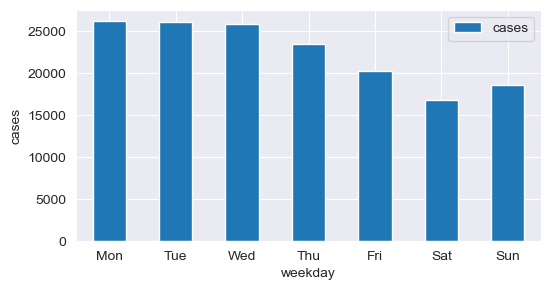

In [65]:
cases['weekday'] = cases.index.weekday
cases.groupby('weekday').mean().plot.bar(figsize = (6,3), ylabel = 'cases')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tick_params(axis='x', rotation=0);

## Moving average plot (continue)

By using a 7-day rolling mean, we can remove the periodic fluctuations and visualise the overall trend better:

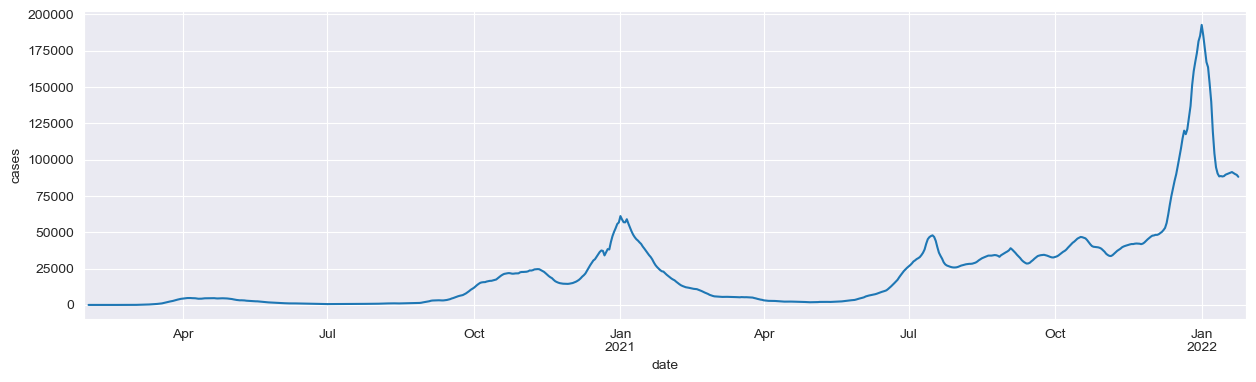

In [66]:
plt.subplots(figsize = (15, 4))
cases['cases'].rolling(7, center=True).mean().plot(ylabel = 'cases');

## Stacked area graph 

A stacked area graph visualises how a quantitative variable of each group changes over time.
* Value of each group at each time point is represented by the height
* Example (number of cases in France, Spain and Italy, data from [here](https://www.ecdc.europa.eu/en/cases-2019-ncov-eueea)):

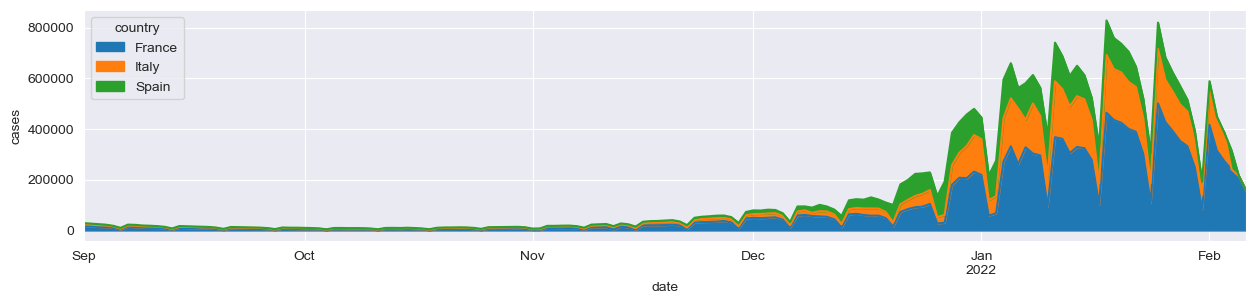

In [67]:
eu_cases = pd.read_csv('data/cases_eu.csv', usecols=[0,4,5,6], parse_dates=[0], 
                       dayfirst=True, index_col=0)
eu_cases.columns = ['cases', 'deaths', 'country']; eu_cases.index.name = 'date'
eu_cases = eu_cases[(eu_cases['country'].isin(['France', 'Spain', 'Italy'])) & 
                    (eu_cases.index >= pd.to_datetime('2021-09-01'))]
eu_cases_wide = eu_cases.pivot_table(index=eu_cases.index, columns='country', 
                                     values='cases').sort_index()
eu_cases_wide.plot(kind = 'area', figsize = (15, 3), ylabel = 'cases');

Like stacked bar chart, stacked area graph can be difficult to read due to change in baseline.

## Multiple lines in one graph

Alternatively, multiple lines in one graph can be used to visualise how a quantitative variable of each group changes over time.

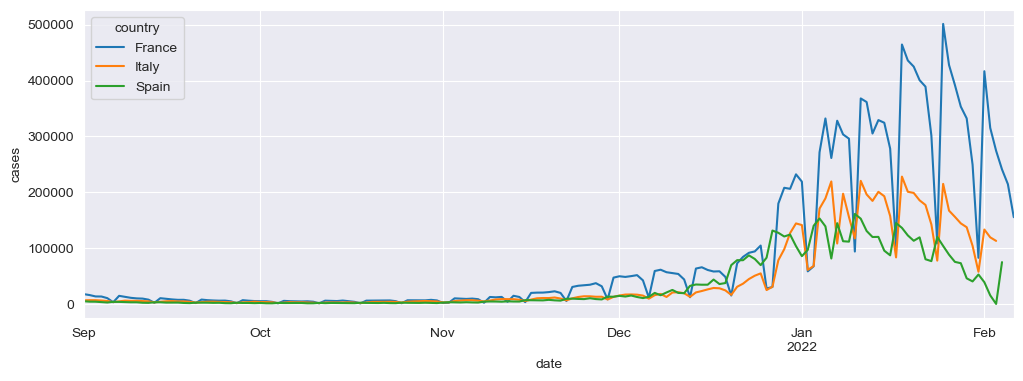

In [68]:
eu_cases_wide.plot(figsize = (12, 4), ylabel = 'cases');

See [here](http://www.perceptualedge.com/articles/visual_business_intelligence/displays_for_combining_time-series_and_part-to-whole.pdf) for more discussion.

## Issues with multiple lines in one graph

When the scale of the variables are different, it is difficult to compare the lines when they are plotted on the same graph.
* Example (number of cases vs deaths in France):

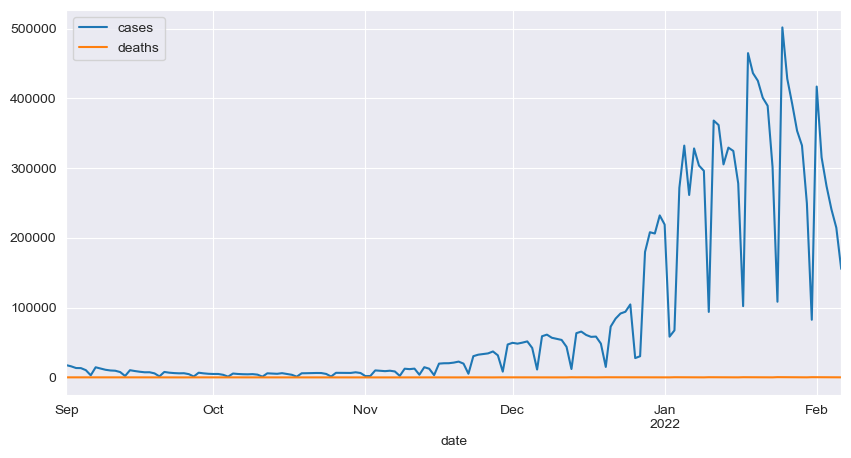

In [69]:
eu_cases[eu_cases['country'] == 'France'].plot(figsize = (10, 5));

## Plot with different y axes 

One possible solution is we use different y axes for the two variables:

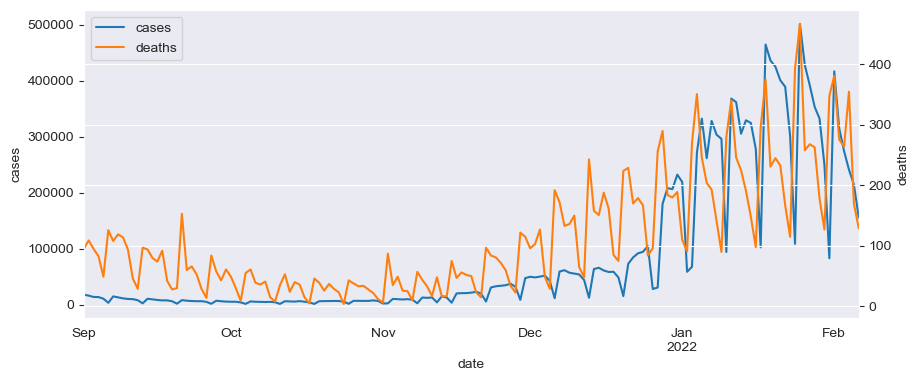

In [70]:
ax_1 = eu_cases.loc[eu_cases.country=='France', 'cases'].plot(figsize=(10, 4))
eu_cases.loc[eu_cases.country=='France', 'deaths'].plot(secondary_y=True)
plt.legend(ax_1.get_lines() + ax_1.right_ax.get_lines(), ['cases', 'deaths'])
ax_1.set_ylabel('cases'); ax_1.right_ax.set_ylabel('deaths');

Use with care - can be misleading.

## Line plot - Juxtaposition

Another possible solution: side by side plot with the same x-axis:

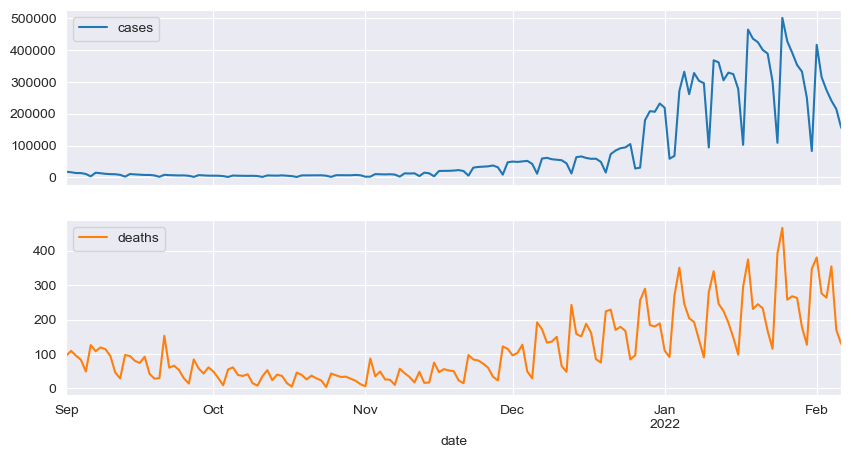

In [71]:
eu_cases[eu_cases.country == 'France'].plot(figsize=(10, 5), subplots = True);

# Transformation and higher dimensions

## Log transformation: reveal patterns with extreme values

When the data has some extreme values, taking log on the values may help to reveal the pattens and provide more meaningful visualisation.
* Example (number of appearances of DC characters):

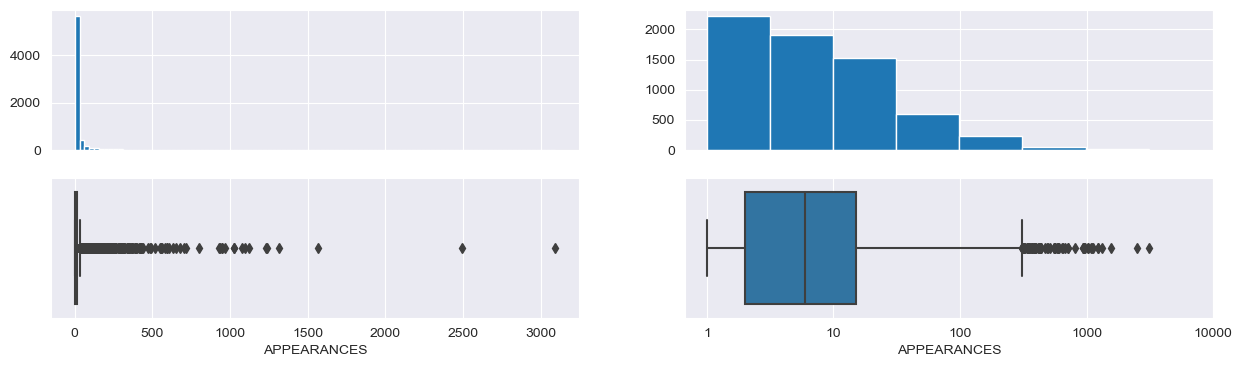

In [72]:
dc = pd.read_csv('data/dc-wikia-data.csv')
fig, ax = plt.subplots(2, 2, figsize = (15, 4), sharex = 'col')
ax[0,0].hist(dc['APPEARANCES'], bins = 100)
sns.boxplot(x = dc['APPEARANCES'], ax = ax[1,0])
log_appearances = np.log10(dc['APPEARANCES'])
ax[0,1].hist(log_appearances, bins = 7);
sns.boxplot(x = log_appearances, ax = ax[1,1])
ax[1,1].set(xticks=np.arange(0, 5), xticklabels=[10**x for x in np.arange(0, 5)]);

## Log transformation: "linearise" relationships

Log transformation can help to "linearise" relationships.
* Example (mpg vs displacement):

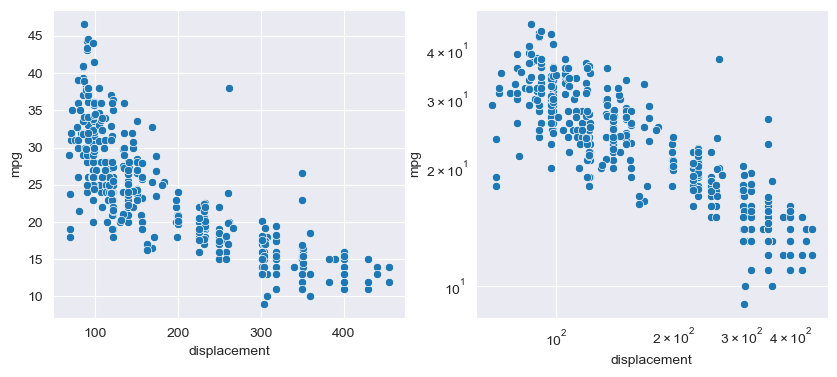

In [73]:
_, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(x = auto['displacement'], y = auto['mpg'], ax = ax[0]);
g = sns.scatterplot(x = auto['displacement'], y = auto['mpg'], ax=ax[1]);
g.set(xscale="log", yscale="log");

## Linearise relationships

If the original relation is _power_:

$$ y = a x^b$$

By taking log on both side, we have:

$$ \log{y} = a + b\log{x}$$

Now $\log{x}$ and $\log{y}$ are in a linear relationship, and we can estimate $a$ and $b$ by some linear models.

## Scatter plot: all pairs

You may want to have scatter plots for all possible pairs of quantitative variables:

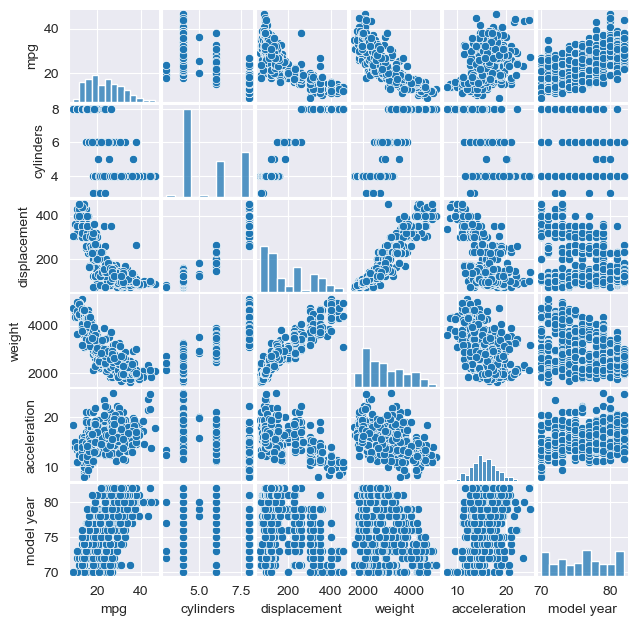

In [74]:
auto['origin'] = auto['origin'].astype('category')
g = sns.pairplot(auto)
g.fig.set_size_inches(6,6);

## Scatter plot: adding dimensions

It is possible to show more than 2 variables on a scatter plot. We can do so by encoding the other variables by different colours, styles and shapes of the markers:
* Quantitative: marker colour, marker size
* Categorical: marker colour, marker style

Example (acceleration vs mpg, with marker colour representing the number of cylinders):

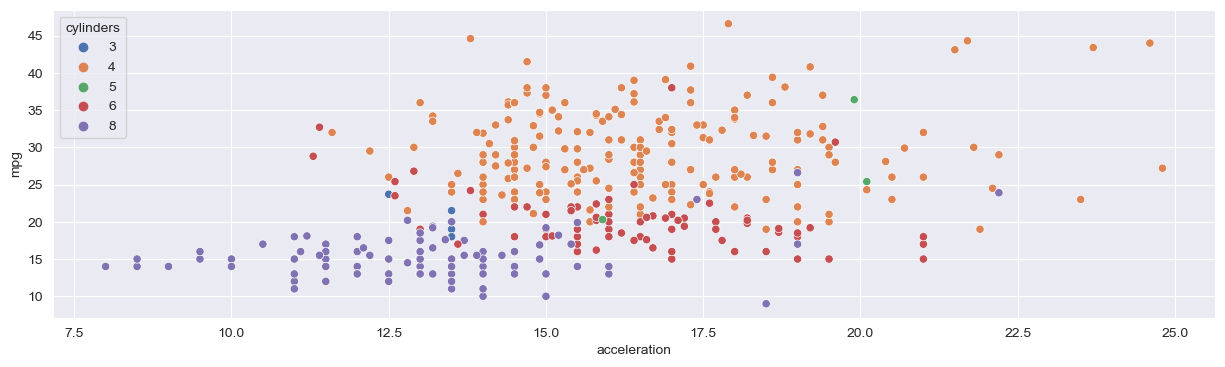

In [75]:
plt.subplots(figsize = (15, 4))
sns.scatterplot(data=auto, x='acceleration', y='mpg', hue='cylinders', palette='deep');

## Scatter plot: adding dimensions (continue)

While in principle you can show 5 variables in one scatter plot, use it with care as the plot can be difficult to read. 
* Example:

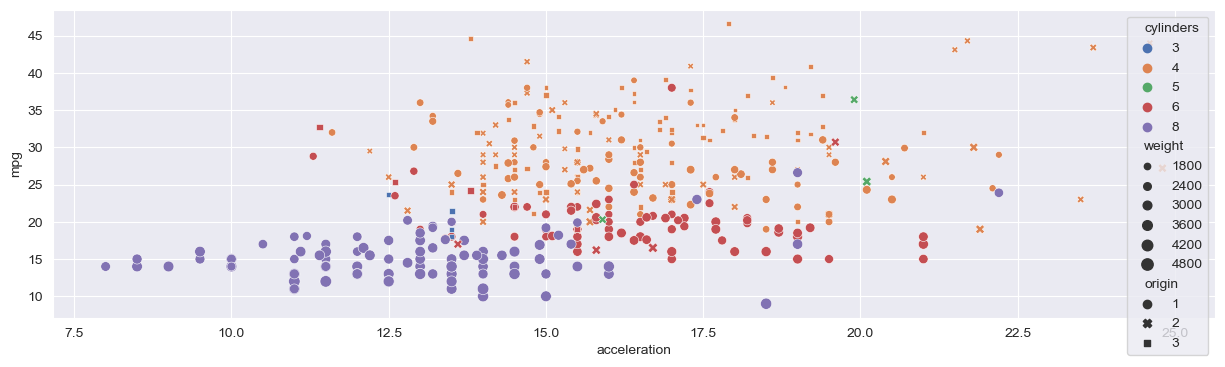

In [76]:
plt.subplots(figsize = (15, 4))
sns.scatterplot(data = auto, x = 'acceleration', y = 'mpg', hue = 'cylinders', 
                style = 'origin', size = 'weight', palette = 'deep');

## Why adding (too many) dimensions on a scatter plot may not be a good idea?

* Too many things to show on the same plot
* Some visual encodings are not effective - for example, human are not good at comparing areas

Relationships may be easier to spot by producing multiple plots with few number of variables.

## Visualise dataset with even higher dimensions

* High-dimensional data: number of variables is large
    * We may have thousands of variables - it is not possible to visualise them all in one plot
* Dimensionality reduction: transform the high-dimensional data to low-dimensional 
    * Reducing the data to 2D allows us to plot the data in a graph
    
We will see how to visualise high-dimensional data by dimensionality reduction in week 9. Stay tuned!



## Summary

Data visualisation for EDA
* Distribution
* Relationship
* Comparison
* Trend

## Preview of workshop

* Perception efficiency
* Data visualisation in Python with the use of:
    * `matplotlib`
    * `seaborn`
    * `pandas`
* Project topic

## Reading resources

* [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
* [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html): Plotting functions
* [Pandas visualisation tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* Data Visualization Fundamentals part of the [Python pre-sessional course](https://moodle.lse.ac.uk/course/view.php?id=7696)
* [E. R. Tufte, The Visual Display of Quantitative Information, Second Edition, Graphics Press, 2001](https://librarysearch.lse.ac.uk/primo-explore/fulldisplay?docid=44LSE_ALMA_DS21135252760002021&context=L&vid=44LSE_VU1&lang=en_US&search_scope=CSCOP_ALL&adaptor=Local%20Search%20Engine&isFrbr=true&tab=default_tab&query=any,contains,The%20Visual%20Display%20of%20Quantitative%20Information&sortby=date&facet=frbrgroupid,include,2513458347&offset=0)